In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from matplotlib.pyplot import plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import time


In [2]:
import os


In [3]:
data_path = "C:/Users/kulpr/Documents/Learning/customer_segmentation/"

In [4]:
asiles = pd.read_csv(data_path + 'aisles.csv')

In [5]:
asiles.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [6]:
departments = pd.read_csv(data_path + 'departments.csv')

In [7]:
departments.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [8]:
order_products__prior = pd.read_csv(data_path + 'order_products__prior.csv')

In [9]:
order_products__prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [10]:
order_products_train = pd.read_csv(data_path + 'order_products__train.csv')

In [11]:
order_products_train.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [12]:
orders = pd.read_csv(data_path + "orders.csv")

In [13]:
orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [14]:
products = pd.read_csv(data_path + "products.csv")

In [15]:
products.head()


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [16]:
############################################ Read Files ###########################################################

def read_data(path):
    all_dfs = {}
    df = pd.DataFrame()
    files = os.listdir(path)
    missing_values_format = ["n.a","?","NA","n/a","na","--","-"]
    
    for file in files:
        if file.endswith(".csv"):
            all_dfs[file[:file.find(".")]] = pd.read_csv(os.path.join(path,file), na_values = missing_values_format)
            
    return all_dfs
            

            
########################################## Summarise Files #########################################################

def summarise_data(df):
    print("\nOverview")
    display(df.head())
    print("\nSummary")
    display(df.describe(include= "all"))
    print("\nNull Values")
    display(df.isnull().sum()/len(df))
    

In [17]:
path = "C:/Users/kulpr/Documents/Learning/customer_segmentation/"
all_dfs= read_data(path)
print("******************* Aisles **************")
summarise_data(all_dfs['aisles'])

print("******************* Deparments **************")
summarise_data(all_dfs['departments'])

print("******************* Order products prior **************")
summarise_data(all_dfs['order_products__prior'])

print("******************* Order products train **************")
summarise_data(all_dfs['order_products__train'])

print("******************* Orders **************")
summarise_data(all_dfs['orders'])

print("******************* Products **************")
summarise_data(all_dfs['products'])

print("******************* Sample Submission **************")
summarise_data(all_dfs['sample_submission'])


******************* Aisles **************

Overview


aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


Summary


aisle_id                  aisle
count   134.000000                    134
unique         NaN                    134
top            NaN  prepared soups salads
freq           NaN                      1
mean     67.500000                    NaN
std      38.826537                    NaN
min       1.000000                    NaN
25%      34.250000                    NaN
50%      67.500000                    NaN
75%     100.750000                    NaN
max     134.000000                    NaN


Null Values


aisle_id    0.0
aisle       0.0
dtype: float64

******************* Deparments **************

Overview


department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


Summary


department_id department
count       21.000000         21
unique            NaN         21
top               NaN     frozen
freq              NaN          1
mean        11.000000        NaN
std          6.204837        NaN
min          1.000000        NaN
25%          6.000000        NaN
50%         11.000000        NaN
75%         16.000000        NaN
max         21.000000        NaN


Null Values


department_id    0.0
department       0.0
dtype: float64

******************* Order products prior **************

Overview


order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


Summary


order_id    product_id  add_to_cart_order     reordered
count  3.243449e+07  3.243449e+07       3.243449e+07  3.243449e+07
mean   1.710749e+06  2.557634e+04       8.351076e+00  5.896975e-01
std    9.873007e+05  1.409669e+04       7.126671e+00  4.918886e-01
min    2.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.559430e+05  1.353000e+04       3.000000e+00  0.000000e+00
50%    1.711048e+06  2.525600e+04       6.000000e+00  1.000000e+00
75%    2.565514e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421083e+06  4.968800e+04       1.450000e+02  1.000000e+00


Null Values


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

******************* Order products train **************

Overview


order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


Summary


order_id    product_id  add_to_cart_order     reordered
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00


Null Values


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

******************* Orders **************

Overview


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0


Summary


order_id       user_id eval_set  order_number     order_dow  \
count   3.421083e+06  3.421083e+06  3421083  3.421083e+06  3.421083e+06   
unique           NaN           NaN        3           NaN           NaN   
top              NaN           NaN    prior           NaN           NaN   
freq             NaN           NaN  3214874           NaN           NaN   
mean    1.710542e+06  1.029782e+05      NaN  1.715486e+01  2.776219e+00   
std     9.875817e+05  5.953372e+04      NaN  1.773316e+01  2.046829e+00   
min     1.000000e+00  1.000000e+00      NaN  1.000000e+00  0.000000e+00   
25%     8.552715e+05  5.139400e+04      NaN  5.000000e+00  1.000000e+00   
50%     1.710542e+06  1.026890e+05      NaN  1.100000e+01  3.000000e+00   
75%     2.565812e+06  1.543850e+05      NaN  2.300000e+01  5.000000e+00   
max     3.421083e+06  2.062090e+05      NaN  1.000000e+02  6.000000e+00   

        order_hour_of_day  days_since_prior_order  
count        3.421083e+06            3.214874e+06  
unique                NaN                     NaN  
top                   NaN                     NaN  
freq                  NaN                     NaN  
mean         1.345202e+01            1.111484e+01  
std          4.226088e+00            9.206737e+00  
min          0.000000e+00            0.000000e+00  
25%          1.000000e+01            4.000000e+00  
50%          1.300000e+01            7.000000e+00  
75%          1.600000e+01            1.500000e+01  
max          2.300000e+01            3.000000e+01


Null Values


order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

******************* Products **************

Overview


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13


Summary


product_id                product_name      aisle_id  department_id
count   49688.000000                       49688  49688.000000   49688.000000
unique           NaN                       49688           NaN            NaN
top              NaN  Chocolate Sandwich Cookies           NaN            NaN
freq             NaN                           1           NaN            NaN
mean    24844.500000                         NaN     67.769582      11.728687
std     14343.834425                         NaN     38.316162       5.850410
min         1.000000                         NaN      1.000000       1.000000
25%     12422.750000                         NaN     35.000000       7.000000
50%     24844.500000                         NaN     69.000000      13.000000
75%     37266.250000                         NaN    100.000000      17.000000
max     49688.000000                         NaN    134.000000      21.000000


Null Values


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

******************* Sample Submission **************

Overview


order_id     products
0        17  39276 29259
1        34  39276 29259
2       137  39276 29259
3       182  39276 29259
4       257  39276 29259


Summary


order_id     products
count   7.500000e+04        75000
unique           NaN            1
top              NaN  39276 29259
freq             NaN        75000
mean    1.709686e+06          NaN
std     9.878542e+05          NaN
min     1.700000e+01          NaN
25%     8.557232e+05          NaN
50%     1.710152e+06          NaN
75%     2.562794e+06          NaN
max     3.421054e+06          NaN


Null Values


order_id    0.0
products    0.0
dtype: float64

In [18]:

# MISSING VALUE TREATMENT

# Checking reason for Missing values and applying apt missing value treatment

all_dfs['orders'].loc[all_dfs['orders']['order_number']==1,'days_since_prior_order'] = 0
summarise_data(all_dfs['orders'])



Overview


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     0.0  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0


Summary


order_id       user_id eval_set  order_number     order_dow  \
count   3.421083e+06  3.421083e+06  3421083  3.421083e+06  3.421083e+06   
unique           NaN           NaN        3           NaN           NaN   
top              NaN           NaN    prior           NaN           NaN   
freq             NaN           NaN  3214874           NaN           NaN   
mean    1.710542e+06  1.029782e+05      NaN  1.715486e+01  2.776219e+00   
std     9.875817e+05  5.953372e+04      NaN  1.773316e+01  2.046829e+00   
min     1.000000e+00  1.000000e+00      NaN  1.000000e+00  0.000000e+00   
25%     8.552715e+05  5.139400e+04      NaN  5.000000e+00  1.000000e+00   
50%     1.710542e+06  1.026890e+05      NaN  1.100000e+01  3.000000e+00   
75%     2.565812e+06  1.543850e+05      NaN  2.300000e+01  5.000000e+00   
max     3.421083e+06  2.062090e+05      NaN  1.000000e+02  6.000000e+00   

        order_hour_of_day  days_since_prior_order  
count        3.421083e+06            3.421083e+06  
unique                NaN                     NaN  
top                   NaN                     NaN  
freq                  NaN                     NaN  
mean         1.345202e+01            1.044488e+01  
std          4.226088e+00            9.308727e+00  
min          0.000000e+00            0.000000e+00  
25%          1.000000e+01            4.000000e+00  
50%          1.300000e+01            7.000000e+00  
75%          1.600000e+01            1.500000e+01  
max          2.300000e+01            3.000000e+01


Null Values


order_id                  0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [19]:
all_dfs['order_products__train'].columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [20]:
all_dfs['orders'].columns   #column names

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [21]:
all_dfs['products'].columns 

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [22]:
# For table Aisles

In [23]:
len(all_dfs["aisles"]['aisle'].unique())

134

In [24]:
# For table Departments

In [25]:
len(all_dfs["departments"]['department'].unique()) #unique departments

21

In [26]:
# For table order-product-prior

In [27]:
len(all_dfs["order_products__prior"])

32434489

In [28]:
len(all_dfs["order_products__prior"]['product_id'].unique()) #unique products

49677

In [29]:
len(all_dfs["order_products__prior"]['order_id'].unique()) #unique orders

3214874

In [30]:
# For table order-product-train

In [31]:
len(all_dfs["order_products__train"])

1384617

In [32]:
len(all_dfs["order_products__train"]['order_id'].unique())  #unique orders

131209

In [33]:
len(all_dfs["order_products__train"]['product_id'].unique()) #unique products

39123

In [34]:
#data ={'Aisles' : "134 unique"}
import pandas as pd
data = {'Table Name': ['Aisles', 'departments', 'order-products-prior', 'order-products-train','orders','products'], 
        'Columns Name': ['aisle_id, aisle', 'department_id, department'
                         ,'order_id, product_id, add_to_cart_order'
                         ,'order_id, product_id, add_to_cart_order'
                         ,'order_id, user_id, eval_set, order_number, order_dow'
                         , 'product_id, product_name, aisle_id, department_id'],
       'Description': ['134 unique IDs, names for different aisles at Instacart',
                       '21 unique IDs, names for different departments including missing-looks like the rolled-up metric for aisles e.g. one department might have multiple aisles',
                       "32,434,489 rows at order-product level with 3,214,874 unique orders for 49,677 unique products. 'add_to_cart_order' shows the order in which they were added to the cart and 'reordered'",
                       "Similar to df_prior_orders but only has latest order information. 1,384,617 rows with 131,209 unique order IDs and 39,123",
                      "3,421,083 orders showing information on order ID, user ID, which evaluationdataset the order is in (prior, train, test), day of week, hour of day,days since prior order",
                      "49,688 rows mapping products to aisles and departments"]}
     

df_data = pd.DataFrame.from_dict(data).set_index('Table Name') #pd.DataFrame.from_dict(data, orient='tight')


#Code to align text and header in the table to left
df_data.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

Hypothesis :
    
    Aisles:
          (a) aisle which generates highest revenue, most frequently used aisle, distribution of
          (b) aisle usage based on demographics and other customer info, 
          (c) is there a trend of aisle popularity with time of day, day of week, or any specific month of year?

    department: 
          (a) revenue by dept, frequency of use by dept, distribution of dept usage based
          (b) on demographics and other available customer info
          (c) dept popularity by time of day, day of week, or any specific month of year
        
    order-products-prior:
          (a) most ordered products, most frequent re-ordered products
          (b) products which are only ordered once and not reordered
          (c) Number of products in one order
          (d) are the products that are ordered together from the same aisle/dept?
        
    order-products-train:
          (a) most ordered products, most frequent re-ordered products 
          (b) products which are only ordered once and not reordered 
          (c) Number of products in one order
          (d) are the products that are ordered together from the same aisle/dept?
        
    order-products-train :
          (a) most ordered products, most frequent re-ordered products
          (b) products which are only ordered once and not reordered
          (c) Number of products in one order 
          (d) are the products that are ordered together from the same aisle/dept?
        
    Orders : 
          (a) Most popular day & time for placing an order
          (b) trend of day & time by products
        
    products
          (a) covered in above metrics 
        
    


In [35]:
master_df = pd.concat([all_dfs['order_products__prior'], all_dfs['order_products__train']]).sort_values(by=['order_id'])
master_df.set_index('product_id')

order_id  add_to_cart_order  reordered
product_id                                        
49302              1                  1          1
10246              1                  3          0
49683              1                  4          0
43633              1                  5          1
13176              1                  6          0
...              ...                ...        ...
35211        3421083                  5          0
39678        3421083                  6          1
11352        3421083                  7          0
4600         3421083                  8          0
24852        3421083                  9          1

[33819106 rows x 3 columns]

In [36]:
all_dfs['products'].head(1)

product_id                product_name  aisle_id  department_id
0           1  Chocolate Sandwich Cookies        61             19

In [37]:

start_time = time.time()

############################## Concat all the tables to create a single dataset ############################################# 
products_df = all_dfs['products']
aisles_df =all_dfs['aisles']
departments_df = all_dfs['departments']
orders_df =all_dfs['orders']
order_products_prior_df = all_dfs['order_products__prior']
order_products_train_df = all_dfs['order_products__train']
order_products_prior_df  = pd.concat([all_dfs['order_products__prior'], all_dfs['order_products__train']]).sort_values(by=['order_id'])


master_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
master_df = pd.merge(master_df, aisles_df, on='aisle_id', how='left')
master_df = pd.merge(master_df, departments_df, on='department_id', how='left')
master_df = pd.merge(master_df, orders_df, on = 'order_id', how = 'left')
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

master_df[col_order].head()


summarise_data(master_df)

print("--- {} minutes ---".format((time.time() - start_time)/60.0))


Overview


order_id  product_id  add_to_cart_order  reordered  \
0         1       49302                  1          1   
1         1       10246                  3          0   
2         1       49683                  4          0   
3         1       43633                  5          1   
4         1       13176                  6          0   

                           product_name  aisle_id  department_id  \
0                      Bulgarian Yogurt       120             16   
1                 Organic Celery Hearts        83              4   
2                        Cucumber Kirby        83              4   
3  Lightly Smoked Sardines in Olive Oil        95             15   
4                Bag of Organic Bananas        24              4   

                 aisle    department  user_id eval_set  order_number  \
0               yogurt    dairy eggs   112108    train             4   
1     fresh vegetables       produce   112108    train             4   
2     fresh vegetables       produce   112108    train             4   
3  canned meat seafood  canned goods   112108    train             4   
4         fresh fruits       produce   112108    train             4   

   order_dow  order_hour_of_day  days_since_prior_order  
0          4                 10                     9.0  
1          4                 10                     9.0  
2          4                 10                     9.0  
3          4                 10                     9.0  
4          4                 10                     9.0


Summary


order_id    product_id  add_to_cart_order     reordered  \
count   3.381911e+07  3.381911e+07       3.381911e+07  3.381911e+07   
unique           NaN           NaN                NaN           NaN   
top              NaN           NaN                NaN           NaN   
freq             NaN           NaN                NaN           NaN   
mean    1.710566e+06  2.557551e+04       8.367738e+00  5.900617e-01   
std     9.874008e+05  1.409770e+04       7.139540e+00  4.918220e-01   
min     1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%     8.554130e+05  1.351900e+04       3.000000e+00  0.000000e+00   
50%     1.710660e+06  2.525600e+04       6.000000e+00  1.000000e+00   
75%     2.565587e+06  3.793500e+04       1.100000e+01  1.000000e+00   
max     3.421083e+06  4.968800e+04       1.450000e+02  1.000000e+00   

       product_name      aisle_id  department_id         aisle department  \
count      33819106  3.381911e+07   3.381911e+07      33819106   33819106   
unique        49685           NaN            NaN           134         21   
top          Banana           NaN            NaN  fresh fruits    produce   
freq         491291           NaN            NaN       3792661    9888378   
mean            NaN  7.121799e+01   9.918544e+00           NaN        NaN   
std             NaN  3.819898e+01   6.281655e+00           NaN        NaN   
min             NaN  1.000000e+00   1.000000e+00           NaN        NaN   
25%             NaN  3.100000e+01   4.000000e+00           NaN        NaN   
50%             NaN  8.300000e+01   9.000000e+00           NaN        NaN   
75%             NaN  1.070000e+02   1.600000e+01           NaN        NaN   
max             NaN  1.340000e+02   2.100000e+01           NaN        NaN   

             user_id  eval_set  order_number     order_dow  order_hour_of_day  \
count   3.381911e+07  33819106  3.381911e+07  3.381911e+07       3.381911e+07   
unique           NaN         2           NaN           NaN                NaN   
top              NaN     prior           NaN           NaN                NaN   
freq             NaN  32434489           NaN           NaN                NaN   
mean    1.029444e+05       NaN  1.713998e+01  2.737285e+00       1.343123e+01   
std     5.946733e+04       NaN  1.749829e+01  2.093296e+00       4.246149e+00   
min     1.000000e+00       NaN  1.000000e+00  0.000000e+00       0.000000e+00   
25%     5.143500e+04       NaN  5.000000e+00  1.000000e+00       1.000000e+01   
50%     1.026260e+05       NaN  1.100000e+01  3.000000e+00       1.300000e+01   
75%     1.544120e+05       NaN  2.400000e+01  5.000000e+00       1.600000e+01   
max     2.062090e+05       NaN  1.000000e+02  6.000000e+00       2.300000e+01   

        days_since_prior_order  
count             3.381911e+07  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean              1.066586e+01  
std               9.081234e+00  
min               0.000000e+00  
25%               4.000000e+00  
50%               7.000000e+00  
75%               1.500000e+01  
max               3.000000e+01


Null Values


order_id                  0.0
product_id                0.0
add_to_cart_order         0.0
reordered                 0.0
product_name              0.0
aisle_id                  0.0
department_id             0.0
aisle                     0.0
department                0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

--- 0.9333587249120077 minutes ---


In [38]:
############ Identify Primary Key ###################################


len(master_df.groupby(['user_id','order_id', 'product_id'], as_index = False).count())

33819106

In [39]:
################### Identidfy unique values in columns ##########################################################
######################### i.e I want to see the total number of unique entries in that specific column. ########################
print("\nNumber of rows in master_df: ",len(master_df))
print("Unique user_id: ",master_df['user_id'].nunique(),", % :", f"{master_df['user_id'].nunique()/ len(master_df) : .2%}")
print("Unique order_id: ",master_df['order_id'].nunique(),", % :", f"{master_df['order_id'].nunique()/ len(master_df) : .2%}")
print("Unique department_id: ",master_df['department_id'].nunique(),", % :", f"{master_df['department_id'].nunique()/ len(master_df) : .2%}")
print("Unique aisle_id: ",master_df['aisle_id'].nunique(),", % :", f"{master_df['aisle_id'].nunique()/ len(master_df) : .2%}")
print("Unique add_to_cart_order: ",master_df['add_to_cart_order'].nunique(),", % :", f"{master_df['add_to_cart_order'].nunique()/ len(master_df) : .2%}")


print("Unique reordered: ",master_df['reordered'].nunique(),", % :", f"{master_df['reordered'].nunique()/ len(master_df) : .2%}")
print("Unique product_name: ",master_df['product_name'].nunique(),", % :", f"{master_df['product_name'].nunique()/ len(master_df) : .2%}")
print("Unique aisle: ",master_df['aisle'].nunique(),", % :", f"{master_df['aisle'].nunique()/ len(master_df) : .2%}")
print("Unique department: ",master_df['department'].nunique(),", % :", f"{master_df['department'].nunique()/ len(master_df) : .2%}")
print("Unique eval_set: ",master_df['eval_set'].nunique(),", % :", f"{master_df['eval_set'].nunique()/ len(master_df) : .2%}")

print("Unique order_number: ",master_df['order_number'].nunique(),", % :", f"{master_df['order_number'].nunique()/ len(master_df) : .2%}")
print("Unique order_dow: ",master_df['order_dow'].nunique(),", % :", f"{master_df['order_dow'].nunique()/ len(master_df) : .2%}")
print("Unique order_hour_of_day: ",master_df['order_hour_of_day'].nunique(),", % :", f"{master_df['order_hour_of_day'].nunique()/ len(master_df) : .2%}")
print("Unique days_since_prior_order: ",master_df['days_since_prior_order'].nunique(),", % :", f"{master_df['days_since_prior_order'].nunique()/ len(master_df) : .2%}")



Number of rows in master_df:  33819106
Unique user_id:  206209 , % :  0.61%
Unique order_id:  3346083 , % :  9.89%
Unique department_id:  21 , % :  0.00%
Unique aisle_id:  134 , % :  0.00%
Unique add_to_cart_order:  145 , % :  0.00%
Unique reordered:  2 , % :  0.00%
Unique product_name:  49685 , % :  0.15%
Unique aisle:  134 , % :  0.00%
Unique department:  21 , % :  0.00%
Unique eval_set:  2 , % :  0.00%
Unique order_number:  100 , % :  0.00%
Unique order_dow:  7 , % :  0.00%
Unique order_hour_of_day:  24 , % :  0.00%
Unique days_since_prior_order:  31 , % :  0.00%


In [40]:
#################### Look at heirarchy of products, aisles and departments ################################

master_df.groupby(['department','aisle','product_name'], as_index = False).size()

department                aisle  \
0        alcohol        beers coolers   
1        alcohol        beers coolers   
2        alcohol        beers coolers   
3        alcohol        beers coolers   
4        alcohol        beers coolers   
...          ...                  ...   
49680     snacks  trail mix snack mix   
49681     snacks  trail mix snack mix   
49682     snacks  trail mix snack mix   
49683     snacks  trail mix snack mix   
49684     snacks  trail mix snack mix   

                                          product_name   size  
0                             'Swingtop' Premium Lager      1  
1                                           12 Oz Beer    252  
2                                          12 Oz Lager    389  
3                                        1500 Pale Ale     61  
4                                                 1664     17  
...                                                ...    ...  
49680                            Traditional Snack Mix   2327  
49681                                        Trail Mix  12601  
49682  Tram Bar Peanut Butter Milk Chocolate Trail Mix      7  
49683                               Tropical Trail Mix    214  
49684                                 Wholesome Medley     18  

[49685 rows x 4 columns]

In [41]:
master_df.shape

(33819106, 15)

Text(0.5, 1.0, 'How many orders are made by a single user?')

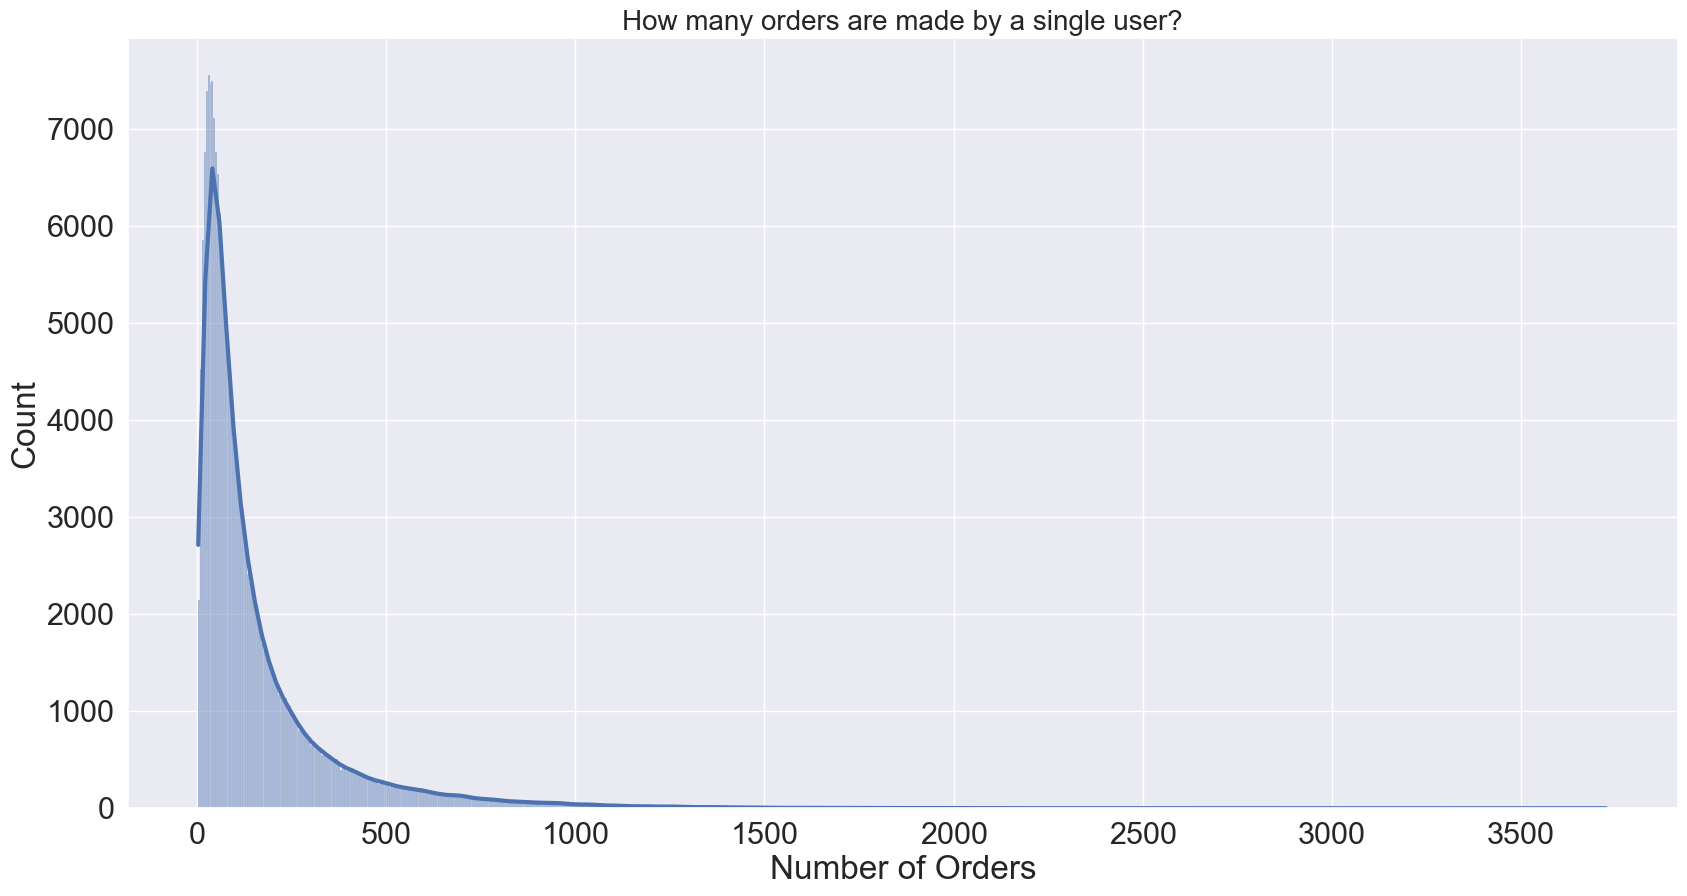

In [42]:
sns.set(font_scale=2)
plt.figure(figsize=(20,10))

data = master_df.groupby('user_id').size().reset_index(name= 'Number of Orders').sort_values(by = 'Number of Orders', ascending= False)
sns.histplot(data = data, x = "Number of Orders", y=None, palette = "bright", kde = True, binwidth=5,edgecolor='white',
            line_kws={'color': 'black', 'lw': 3, 'ls': '-'})

plt.title("How many orders are made by a single user?", size = 20)

Text(0.5, 1.0, 'How many products are in one order?')

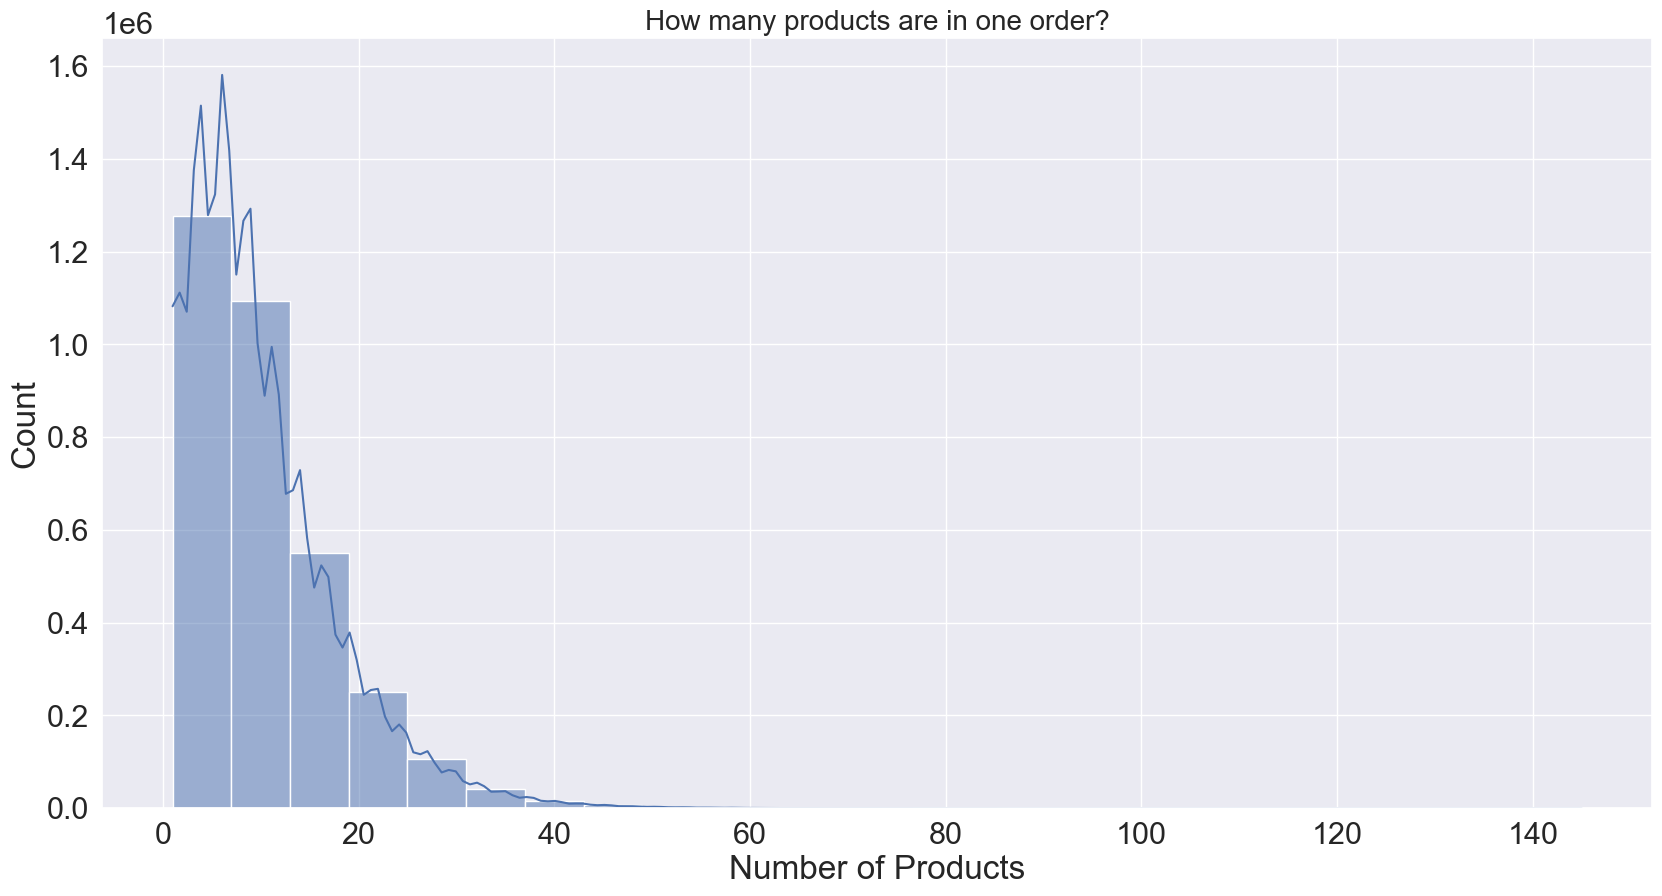

In [43]:
sns.set(font_scale=2)
plt.figure(figsize=(20,10))

data= master_df.groupby("order_id").size().reset_index(name = "Number of Products").sort_values(by = "Number of Products", ascending= False)
sns.histplot(data = data, x= "Number of Products", y=None, palette = "dark", kde=True,binwidth=6,edgecolor= 'white')
plt.title("How many products are in one order?", size = 20)

Text(0.5, 0, 'days since prior order')

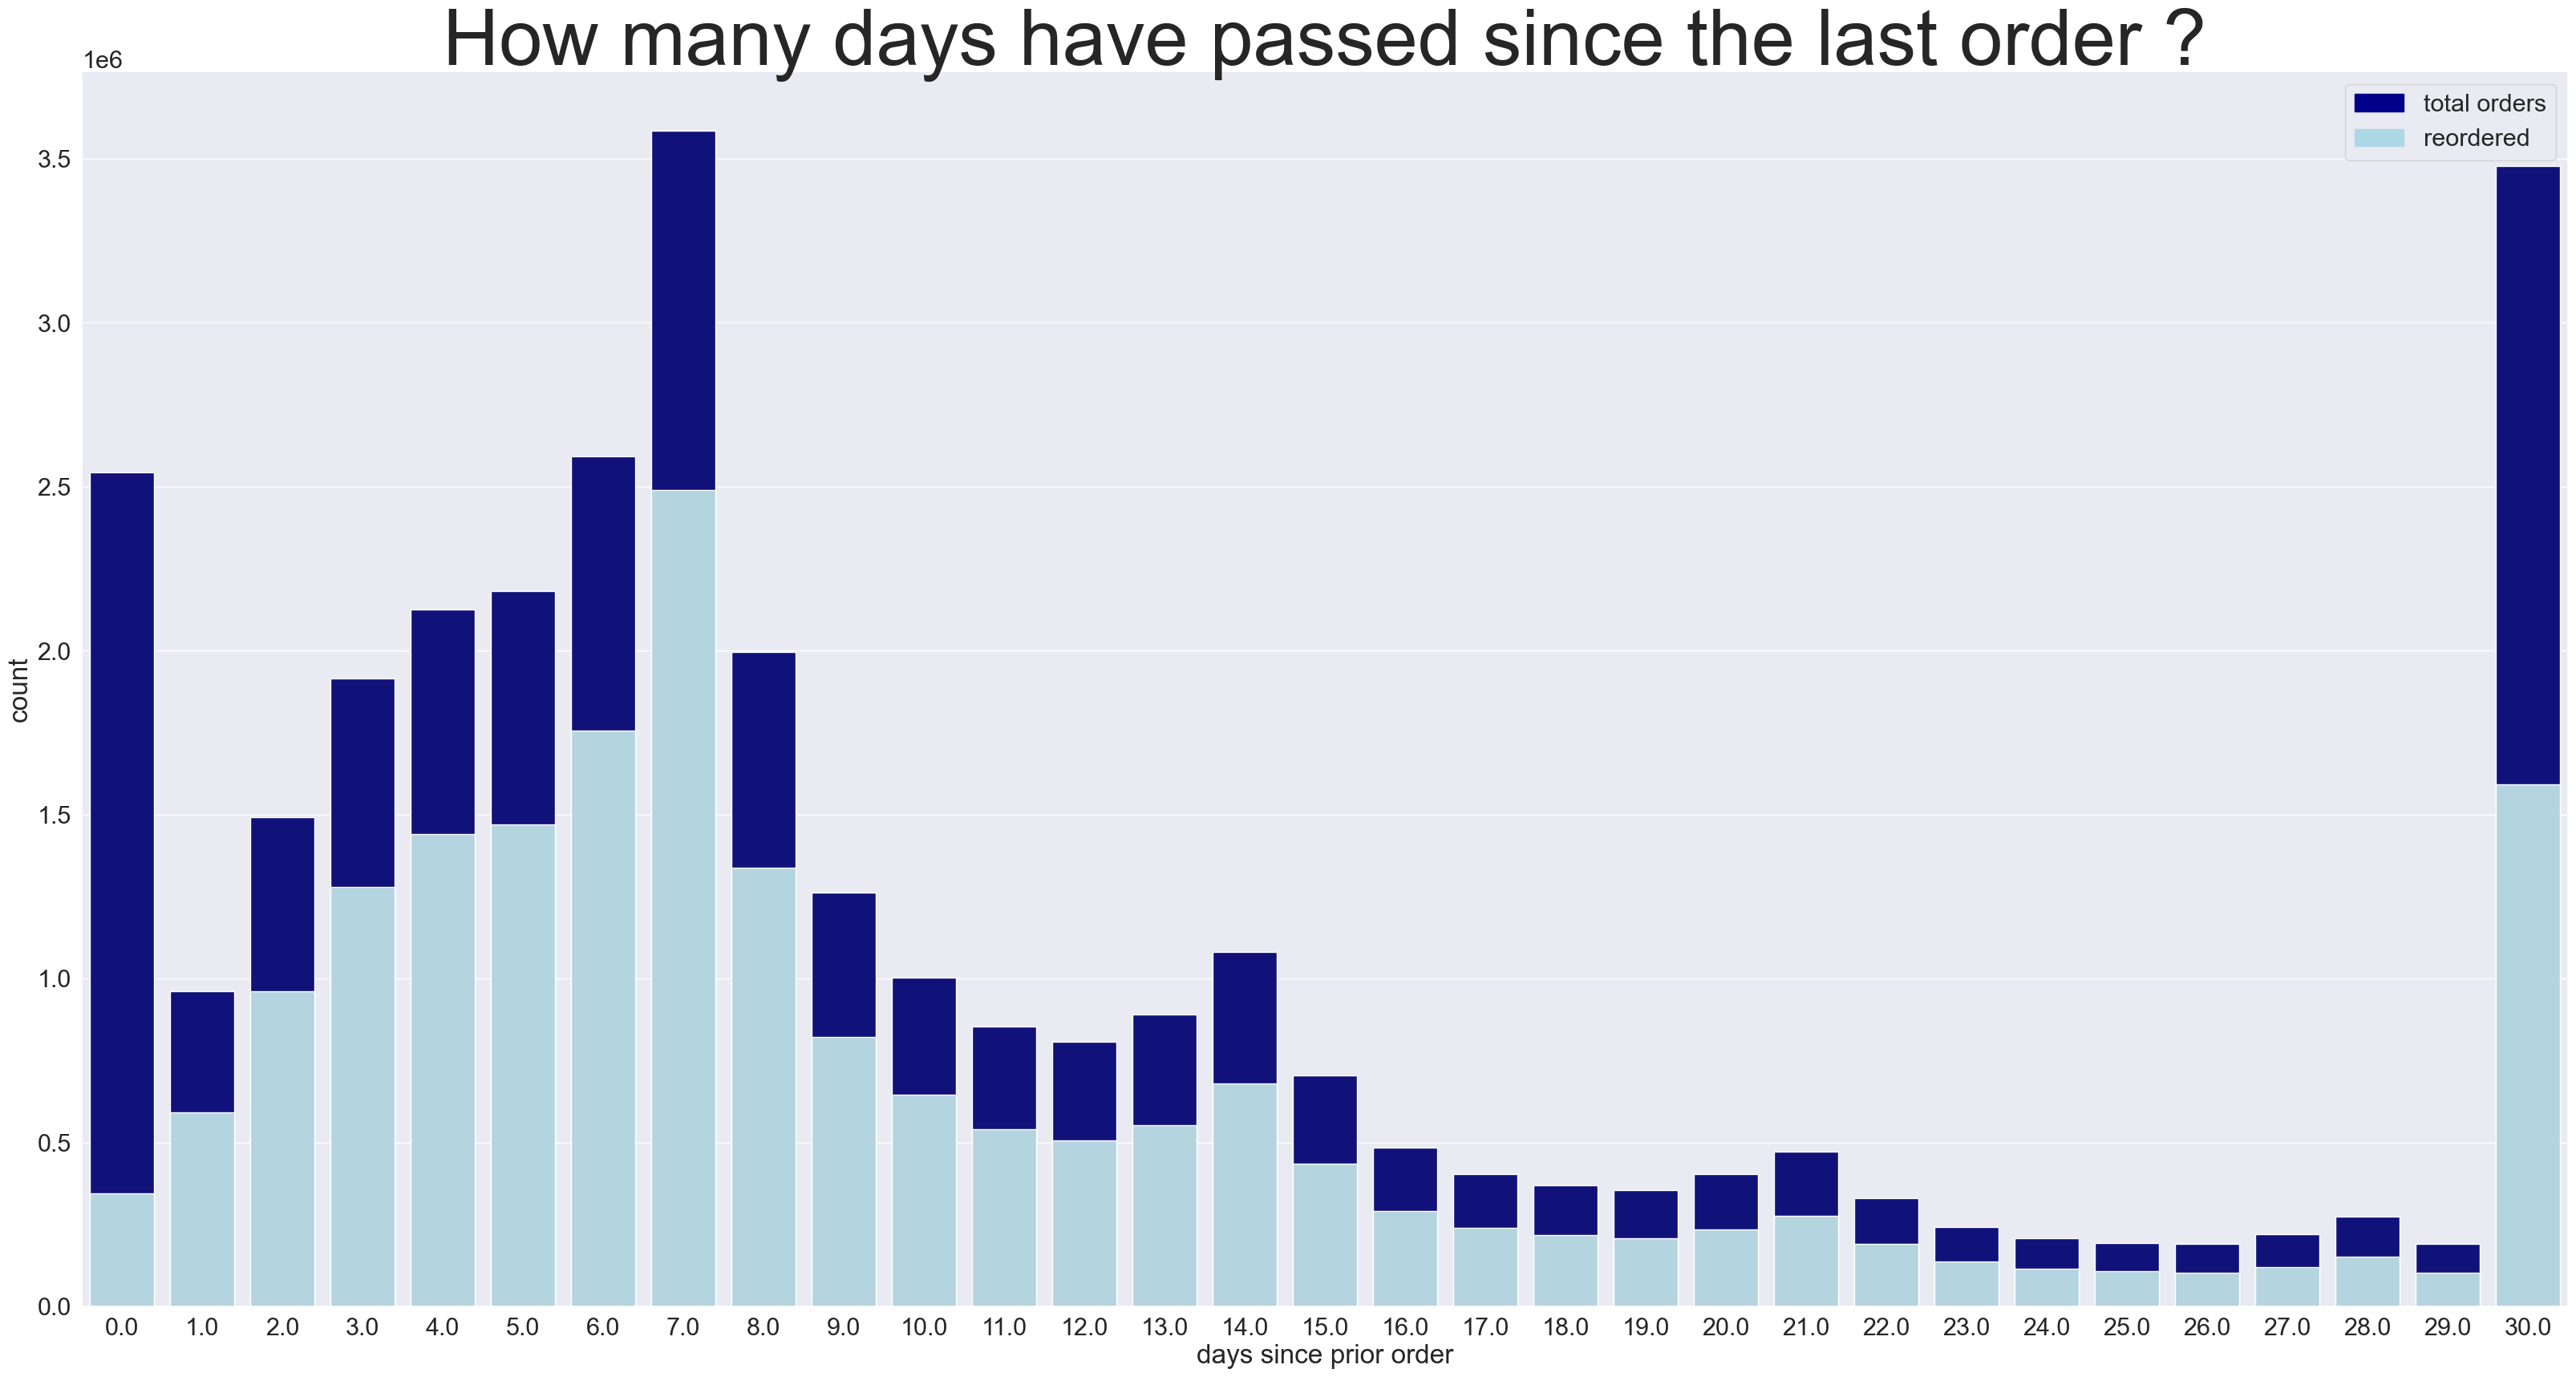

In [44]:
import matplotlib.patches as mpatches
sns.set(font_scale=2)
plt.figure(figsize=(40,20))
data1 = master_df.groupby('days_since_prior_order', as_index=False).size()
bar1 = sns.barplot(x= 'days_since_prior_order', y= "size", data= data1, color = 'darkblue')
data2 = master_df[master_df['reordered']==1].groupby('days_since_prior_order', as_index=False).size()
bar2 = sns.barplot(x= 'days_since_prior_order', y= "size", data= data2, color = 'lightblue')

top_bar = mpatches.Patch(color = 'darkblue', label = 'total orders')
bottom_bar = mpatches.Patch(color = 'lightblue', label = 'reordered')

plt.legend(handles=[top_bar, bottom_bar])
plt.title("How many days have passed since the last order ?", fontsize=70)
plt.ylabel('count')
plt.xlabel('days since prior order')
 

Text(0, 0.5, 'count')

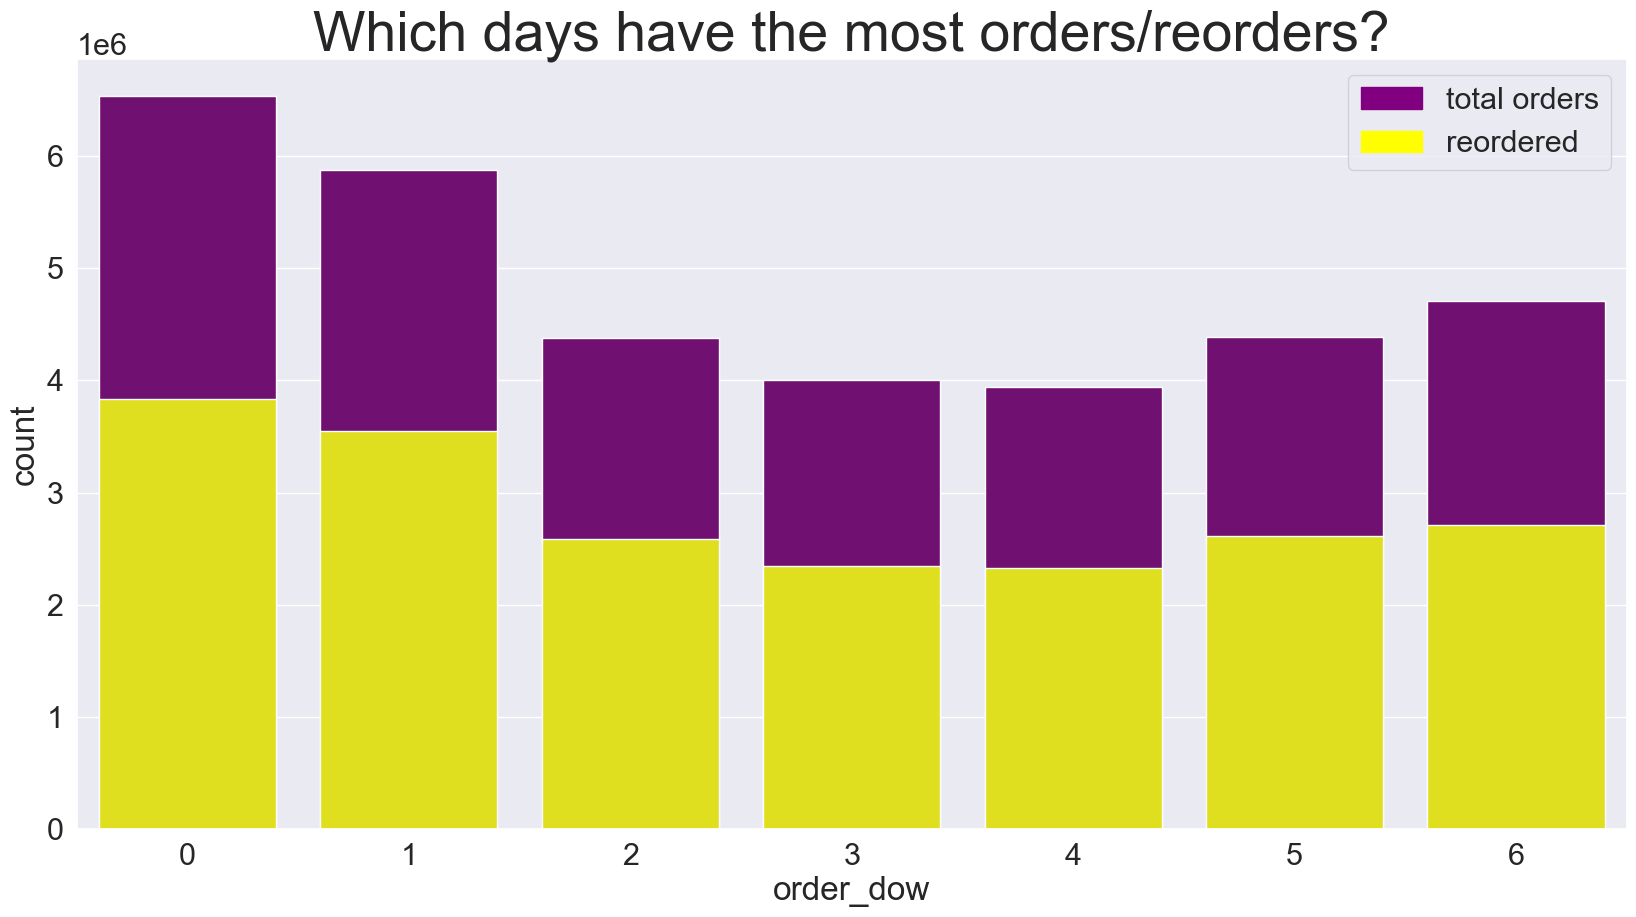

In [45]:
import matplotlib.patches as mpatches
sns.set(font_scale=2)
plt.figure(figsize=(20,10))
data1 = master_df.groupby('order_dow', as_index=False).size()
bar1 = sns.barplot(x= 'order_dow', y= "size", data= data1, color = 'purple')
data2 = master_df[master_df['reordered']==1].groupby('order_dow', as_index=False).size()
bar2 = sns.barplot(x= 'order_dow', y= "size", data= data2, color = 'yellow')

top_bar = mpatches.Patch(color = 'purple', label = 'total orders')
bottom_bar = mpatches.Patch(color = 'yellow', label = 'reordered')

plt.legend(handles=[top_bar, bottom_bar])
plt.title("Which days have the most orders/reorders?", fontsize=40)
plt.ylabel('count')

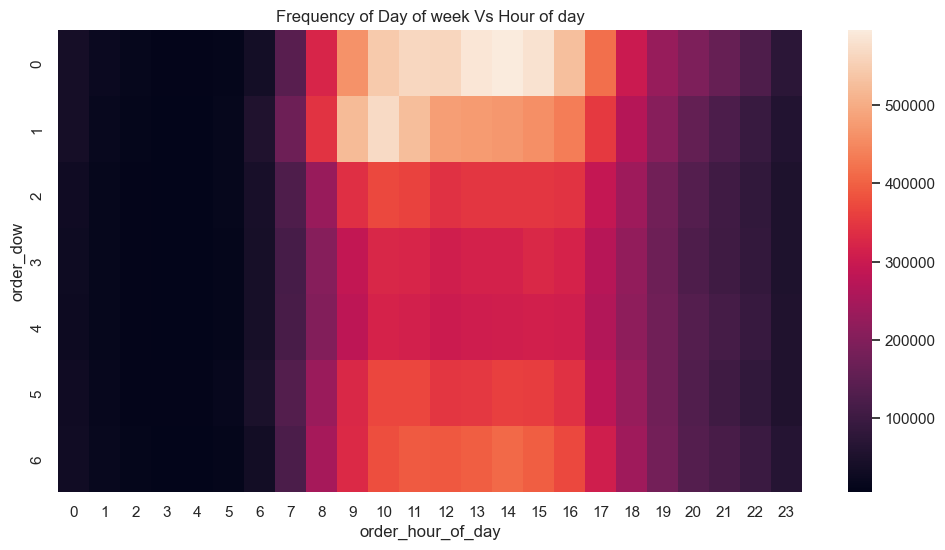

In [46]:
data = master_df.groupby(['order_dow',"order_hour_of_day"])["order_number"].count().sort_values(ascending=False).reset_index()
data = data.pivot('order_dow','order_hour_of_day',"order_number", )
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.heatmap(data)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [47]:
#################################### Data Vizualisation #######################################

def BuildViz (ax, data, x, y, chart_type, legend = False, size = 15, hue = None, palette = None):
    if chart_type == "scatter":
        plot = sns.scatterplot(data=data, x=x, y=y, size=size, legend=legend, 
                               hue=hue, sizes = (20,200), palette = palette, ax=ax)
    elif chart_type == 'bar':
        plot = sns.barplot(x=x, y=y, data=data,hue=hue, palette = palette, ax=ax, ci="sd")
    elif chart_type == 'density':
        plot = sns.kdeplot(x=x, data=data, shade = True, alpha= 0.5, ax=ax,  kde_kws=dict(linewidth=10))
    elif chart_type == 'swarm':
        plot = sns.swarmplot(x=x, y=y, hue=hue, data=data, palette = palette, ax=ax)
    elif chart_type == 'hist':
        plot = sns.histplot(data=data,x=x, kde = True, ax=ax, palette = palette, binwidth = 1,edgecolor='white',
            line_kws={'color': 'black', 'lw': 3, 'ls': '-'})
       
    return plot

Text(0, 0.5, 'count')

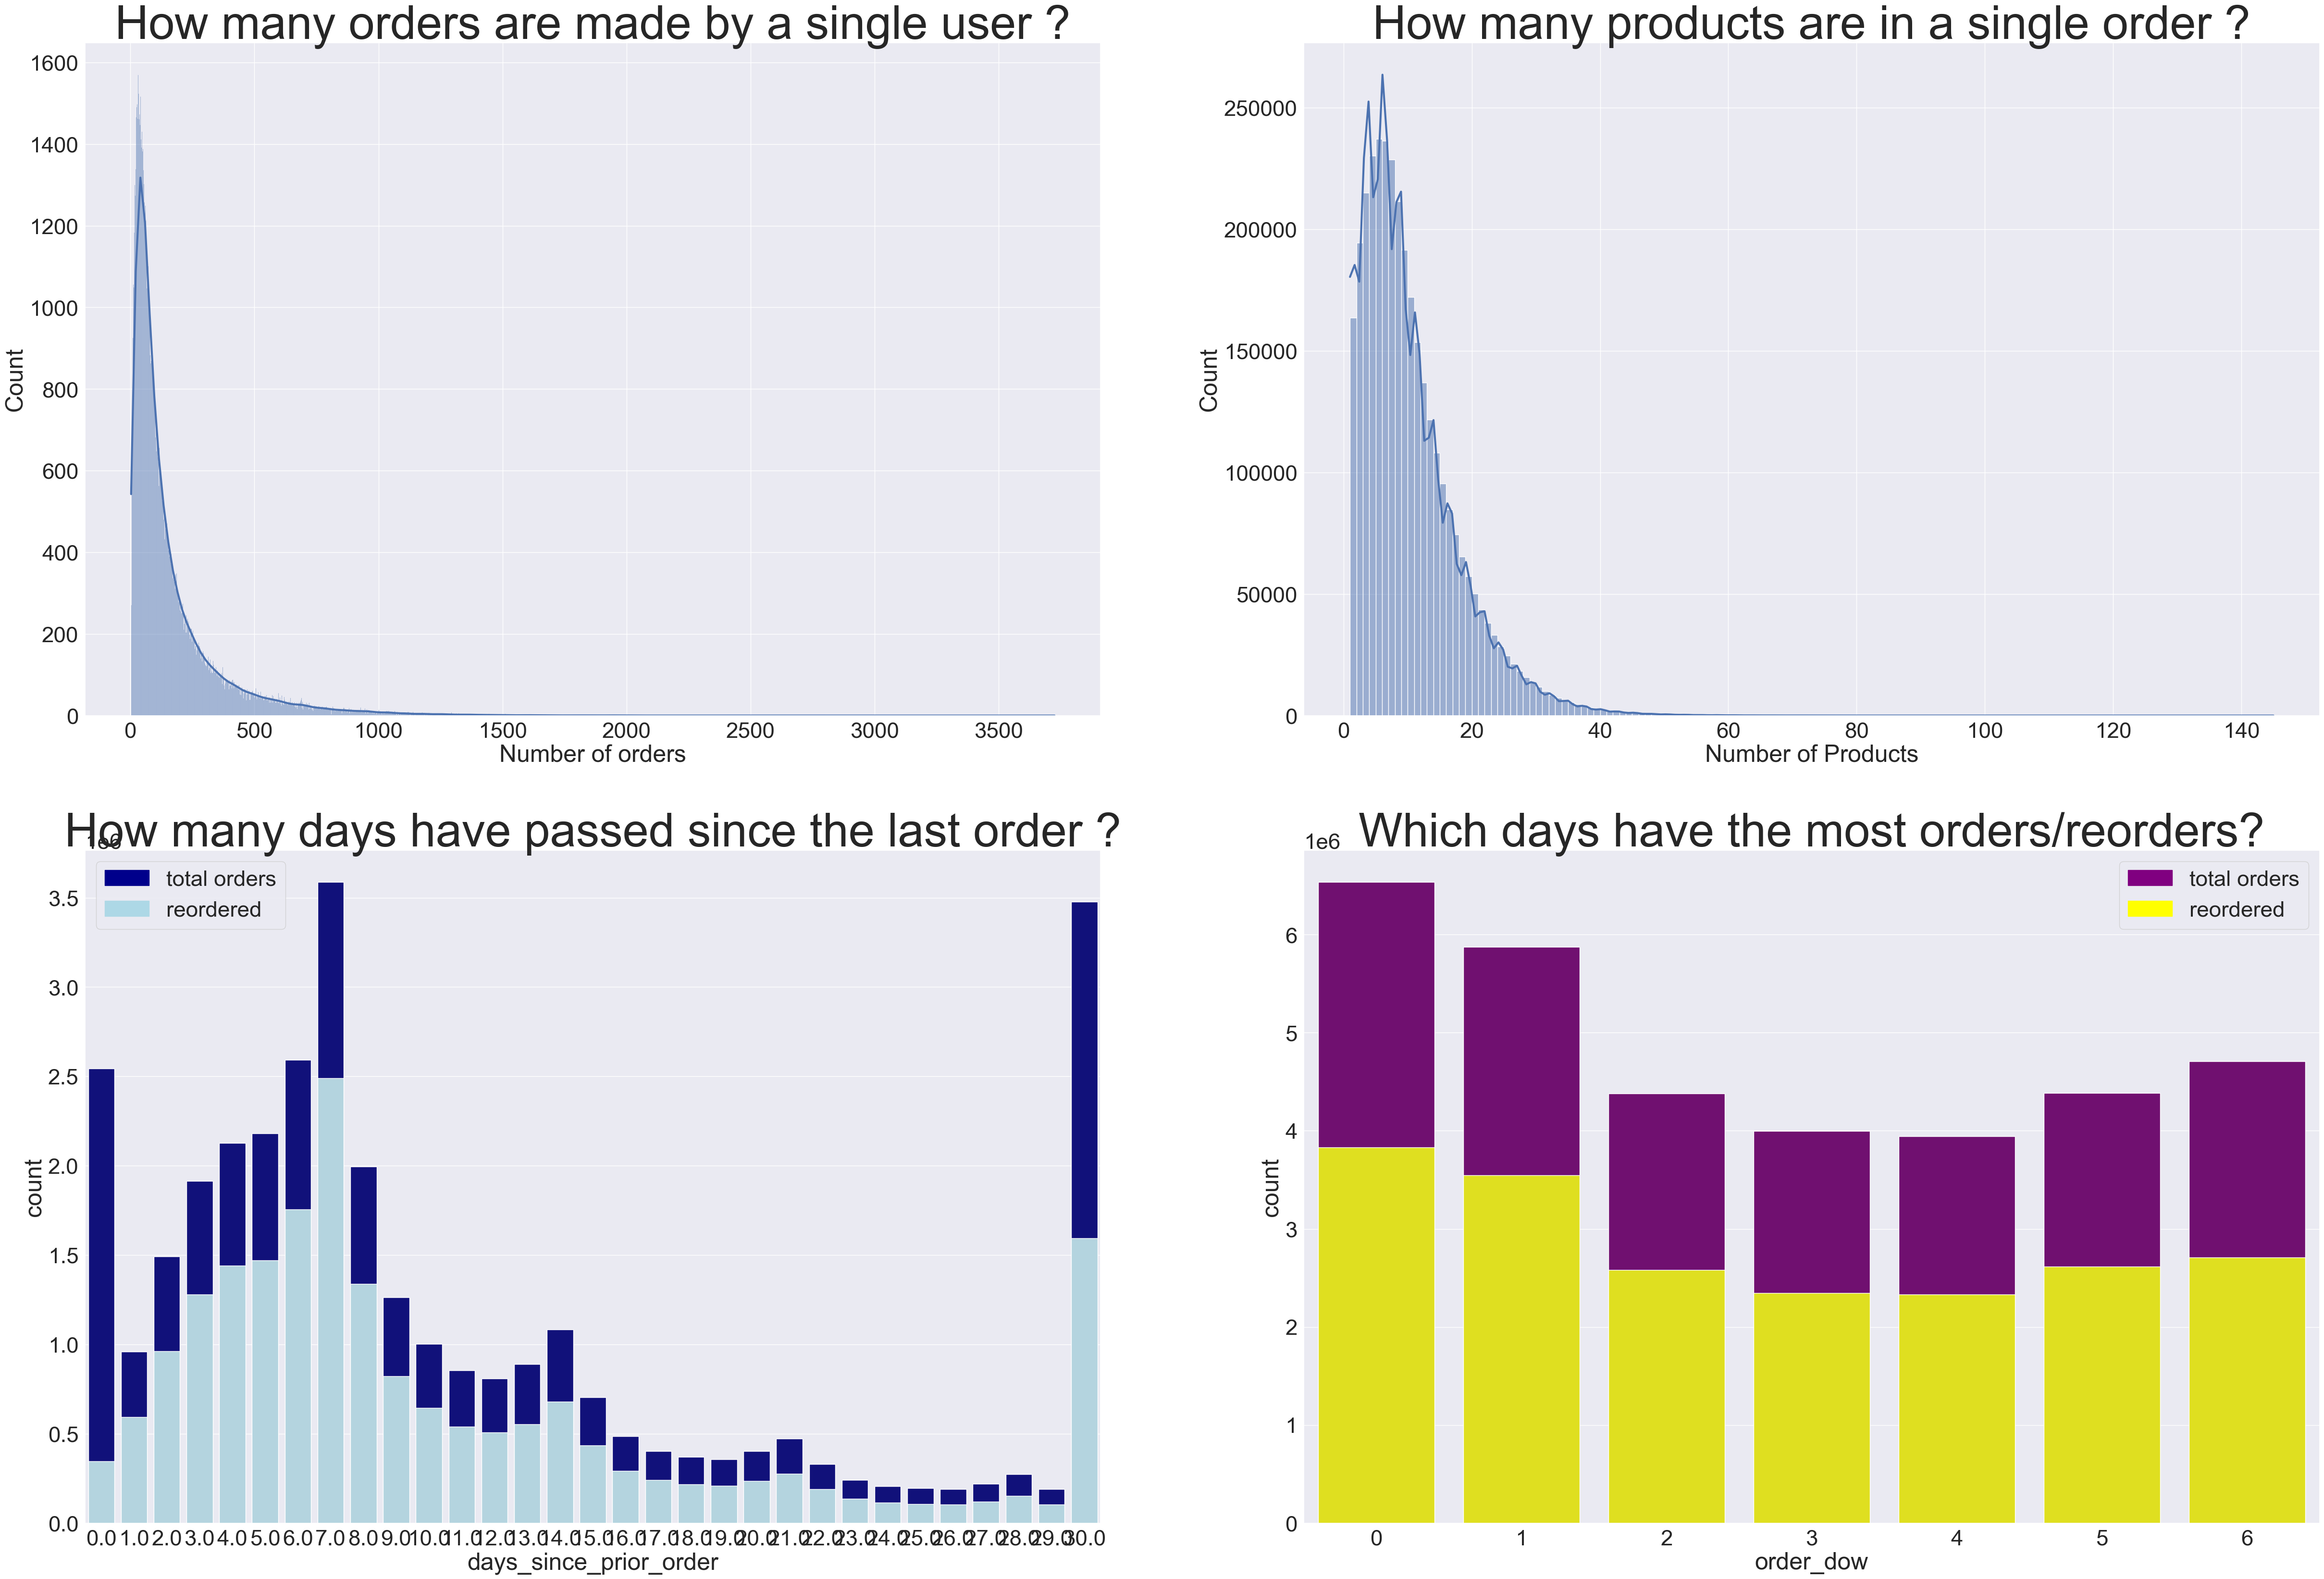

In [48]:
sns.set(style= "darkgrid")
#sns.set(font_scale = 2)
sns.set_context("notebook", font_scale=3)
fig, ax = plt.subplots(2,2, figsize = (60,40))


#******************************* How many orders are made by a single user? *******************************

data = master_df.groupby('user_id').size().reset_index(name = 'Number of orders').sort_values(by = 'Number of orders', ascending = False)
ax[0,0]= BuildViz(ax[0,0], data, x = "Number of orders", y=None, chart_type = "hist", palette = "dark")
ax[0,0].set_title('How many orders are made by a single user ?',fontsize =70)




#******************************* How many products are in a single order ? *******************************
data = master_df.groupby('order_id').size().reset_index(name = 'Number of Products').sort_values(by = 'Number of Products', ascending = False)
ax[0,1]= BuildViz(ax[0,1], data, x = "Number of Products", y=None, chart_type = "hist", palette = "dark")
ax[0,1].set_title('How many products are in a single order ?',fontsize =70)


#******************************* How many days have passed since the last order ? *******************************
import matplotlib.patches as mpatches
data1 = master_df.groupby('days_since_prior_order', as_index=False).size()
bar1 = sns.barplot(x= 'days_since_prior_order', y= "size", data= data1, color = 'darkblue',ax = ax[1,0])
data2 = master_df[master_df['reordered']==1].groupby('days_since_prior_order', as_index=False).size()
bar2 = sns.barplot(x= 'days_since_prior_order', y= "size", data= data2, color = 'lightblue',ax = ax[1,0])

top_bar = mpatches.Patch(color = 'darkblue', label = 'total orders')
bottom_bar = mpatches.Patch(color = 'lightblue', label = 'reordered')

ax[1,0].legend(handles=[top_bar, bottom_bar])
ax[1,0].set_title("How many days have passed since the last order ?", fontsize=70)
ax[1,0].set_ylabel('count')


#******************************* Which days have the most orders/reorders? *******************************
data1 = master_df.groupby('order_dow', as_index=False).size()
bar1 = sns.barplot(x= 'order_dow', y= "size", data= data1, color = 'purple',ax = ax[1,1])
data2 = master_df[master_df['reordered']==1].groupby('order_dow', as_index=False).size()
bar2 = sns.barplot(x= 'order_dow', y= "size", data= data2, color = 'yellow',ax = ax[1,1])

top_bar = mpatches.Patch(color = 'purple', label = 'total orders')
bottom_bar = mpatches.Patch(color = 'yellow', label = 'reordered')

ax[1,1].legend(handles=[top_bar, bottom_bar])
ax[1,1].set_title("Which days have the most orders/reorders?", fontsize=70)
ax[1,1].set_ylabel('count')




Text(0, 0.5, 'count')

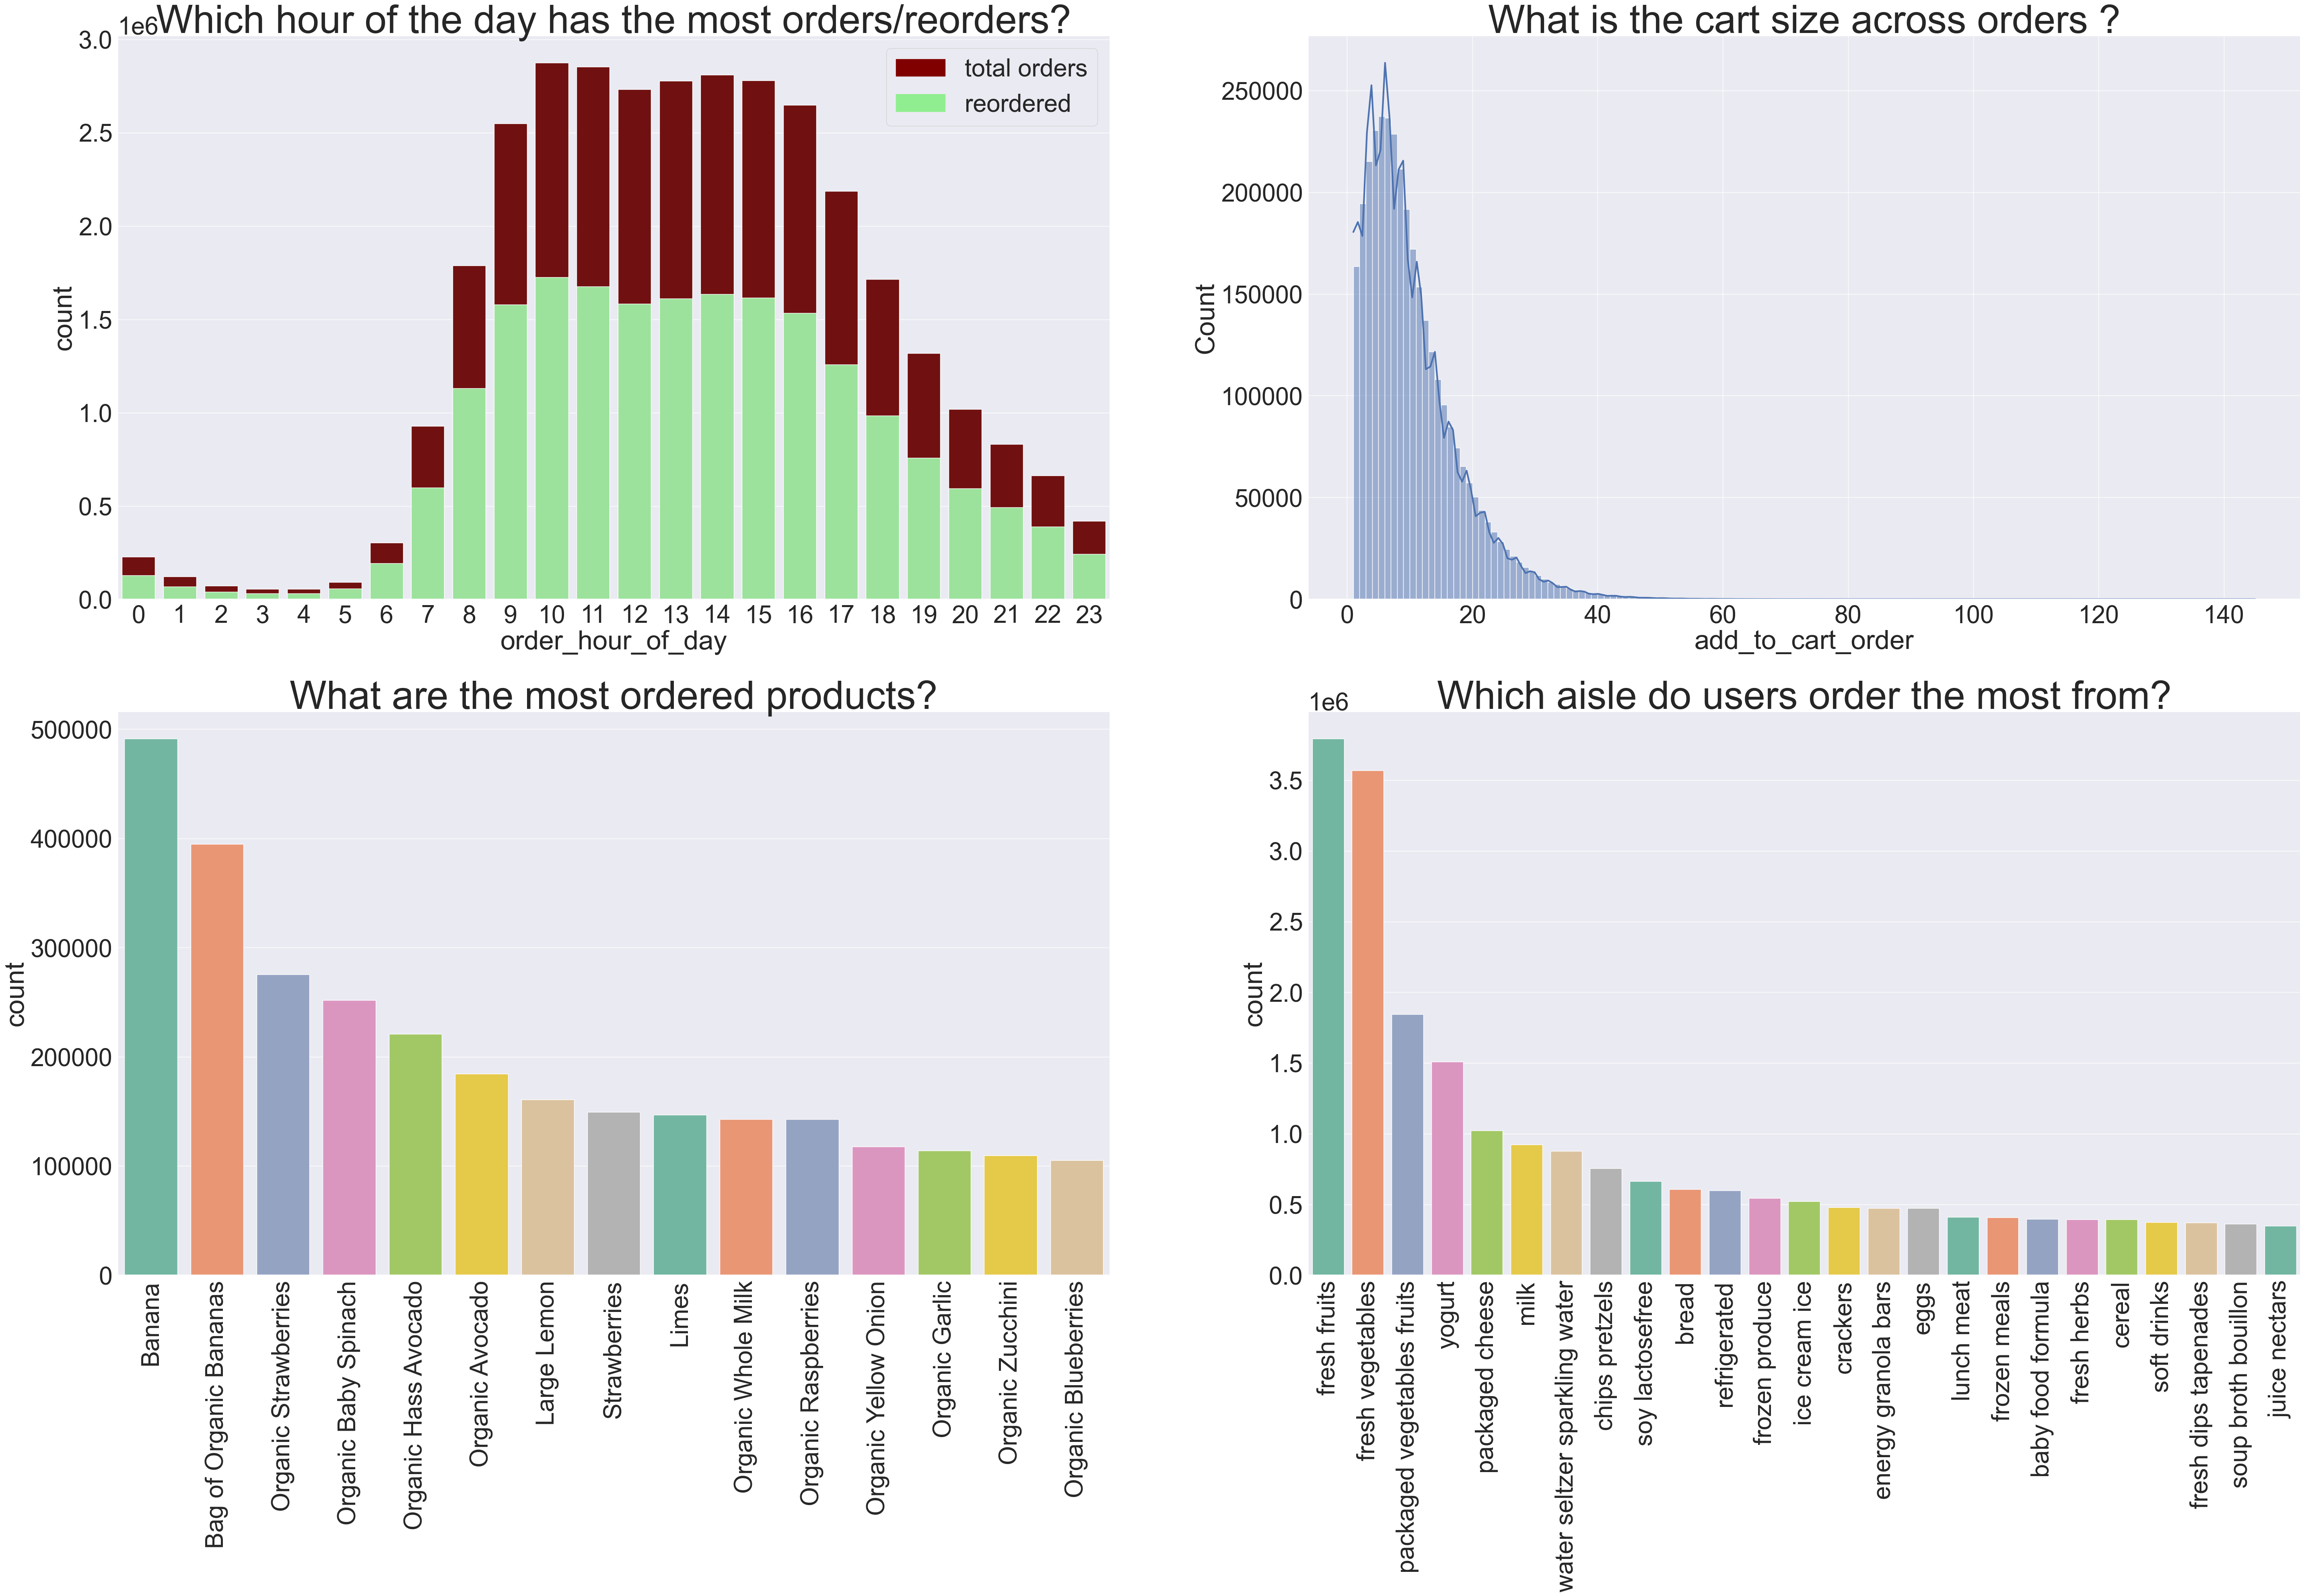

In [49]:

sns.set(style= "darkgrid")
sns.set(font_scale = 4)
sns.set_context("notebook", font_scale=4)
fig, ax = plt.subplots(2,2, figsize = (70,40))



data1 = master_df.groupby('order_hour_of_day', as_index=False).size()
bar1 = sns.barplot(x= 'order_hour_of_day', y= "size", data= data1, color = 'maroon',ax = ax[0,0])
data2 = master_df[master_df['reordered']==1].groupby('order_hour_of_day', as_index=False).size()
bar2 = sns.barplot(x= 'order_hour_of_day', y= "size", data= data2, color = 'lightgreen',ax = ax[0,0])

top_bar = mpatches.Patch(color = 'maroon', label = 'total orders')
bottom_bar = mpatches.Patch(color = 'lightgreen', label = 'reordered')

ax[0,0].legend(handles=[top_bar, bottom_bar])
ax[0,0].set_title("Which hour of the day has the most orders/reorders?", fontsize=70)
ax[0,0].set_ylabel('count')


data = master_df.groupby('order_id', as_index = False)['add_to_cart_order'].max()
ax[0,1]= BuildViz(ax[0,1], data, x = 'add_to_cart_order', y=None, chart_type = "hist", palette = "bright")
ax[0,1].set_title('What is the cart size across orders ?',fontsize =70)


data = master_df.groupby('product_name', as_index = False)['product_id'].count().sort_values(by='product_id', ascending=False)
ax[1,0] = BuildViz(ax[1,0], data.head(15), "product_name", "product_id", "bar", palette = "Set2")
ax[1,0].set_xticklabels(data.head(15)['product_name'], rotation = 90)
ax[1,0].set_title('What are the most ordered products?', fontsize=70)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('count')

data = master_df.groupby('aisle', as_index = False)['aisle_id'].count().sort_values(by='aisle_id', ascending=False)
ax[1,1] = BuildViz(ax[1,1], data.head(25), "aisle", "aisle_id", "bar", palette = "Set2")
ax[1,1].set_xticklabels(data.head(25)['aisle'], rotation = 90)
ax[1,1].set_title('Which aisle do users order the most from?', fontsize=70)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('count')



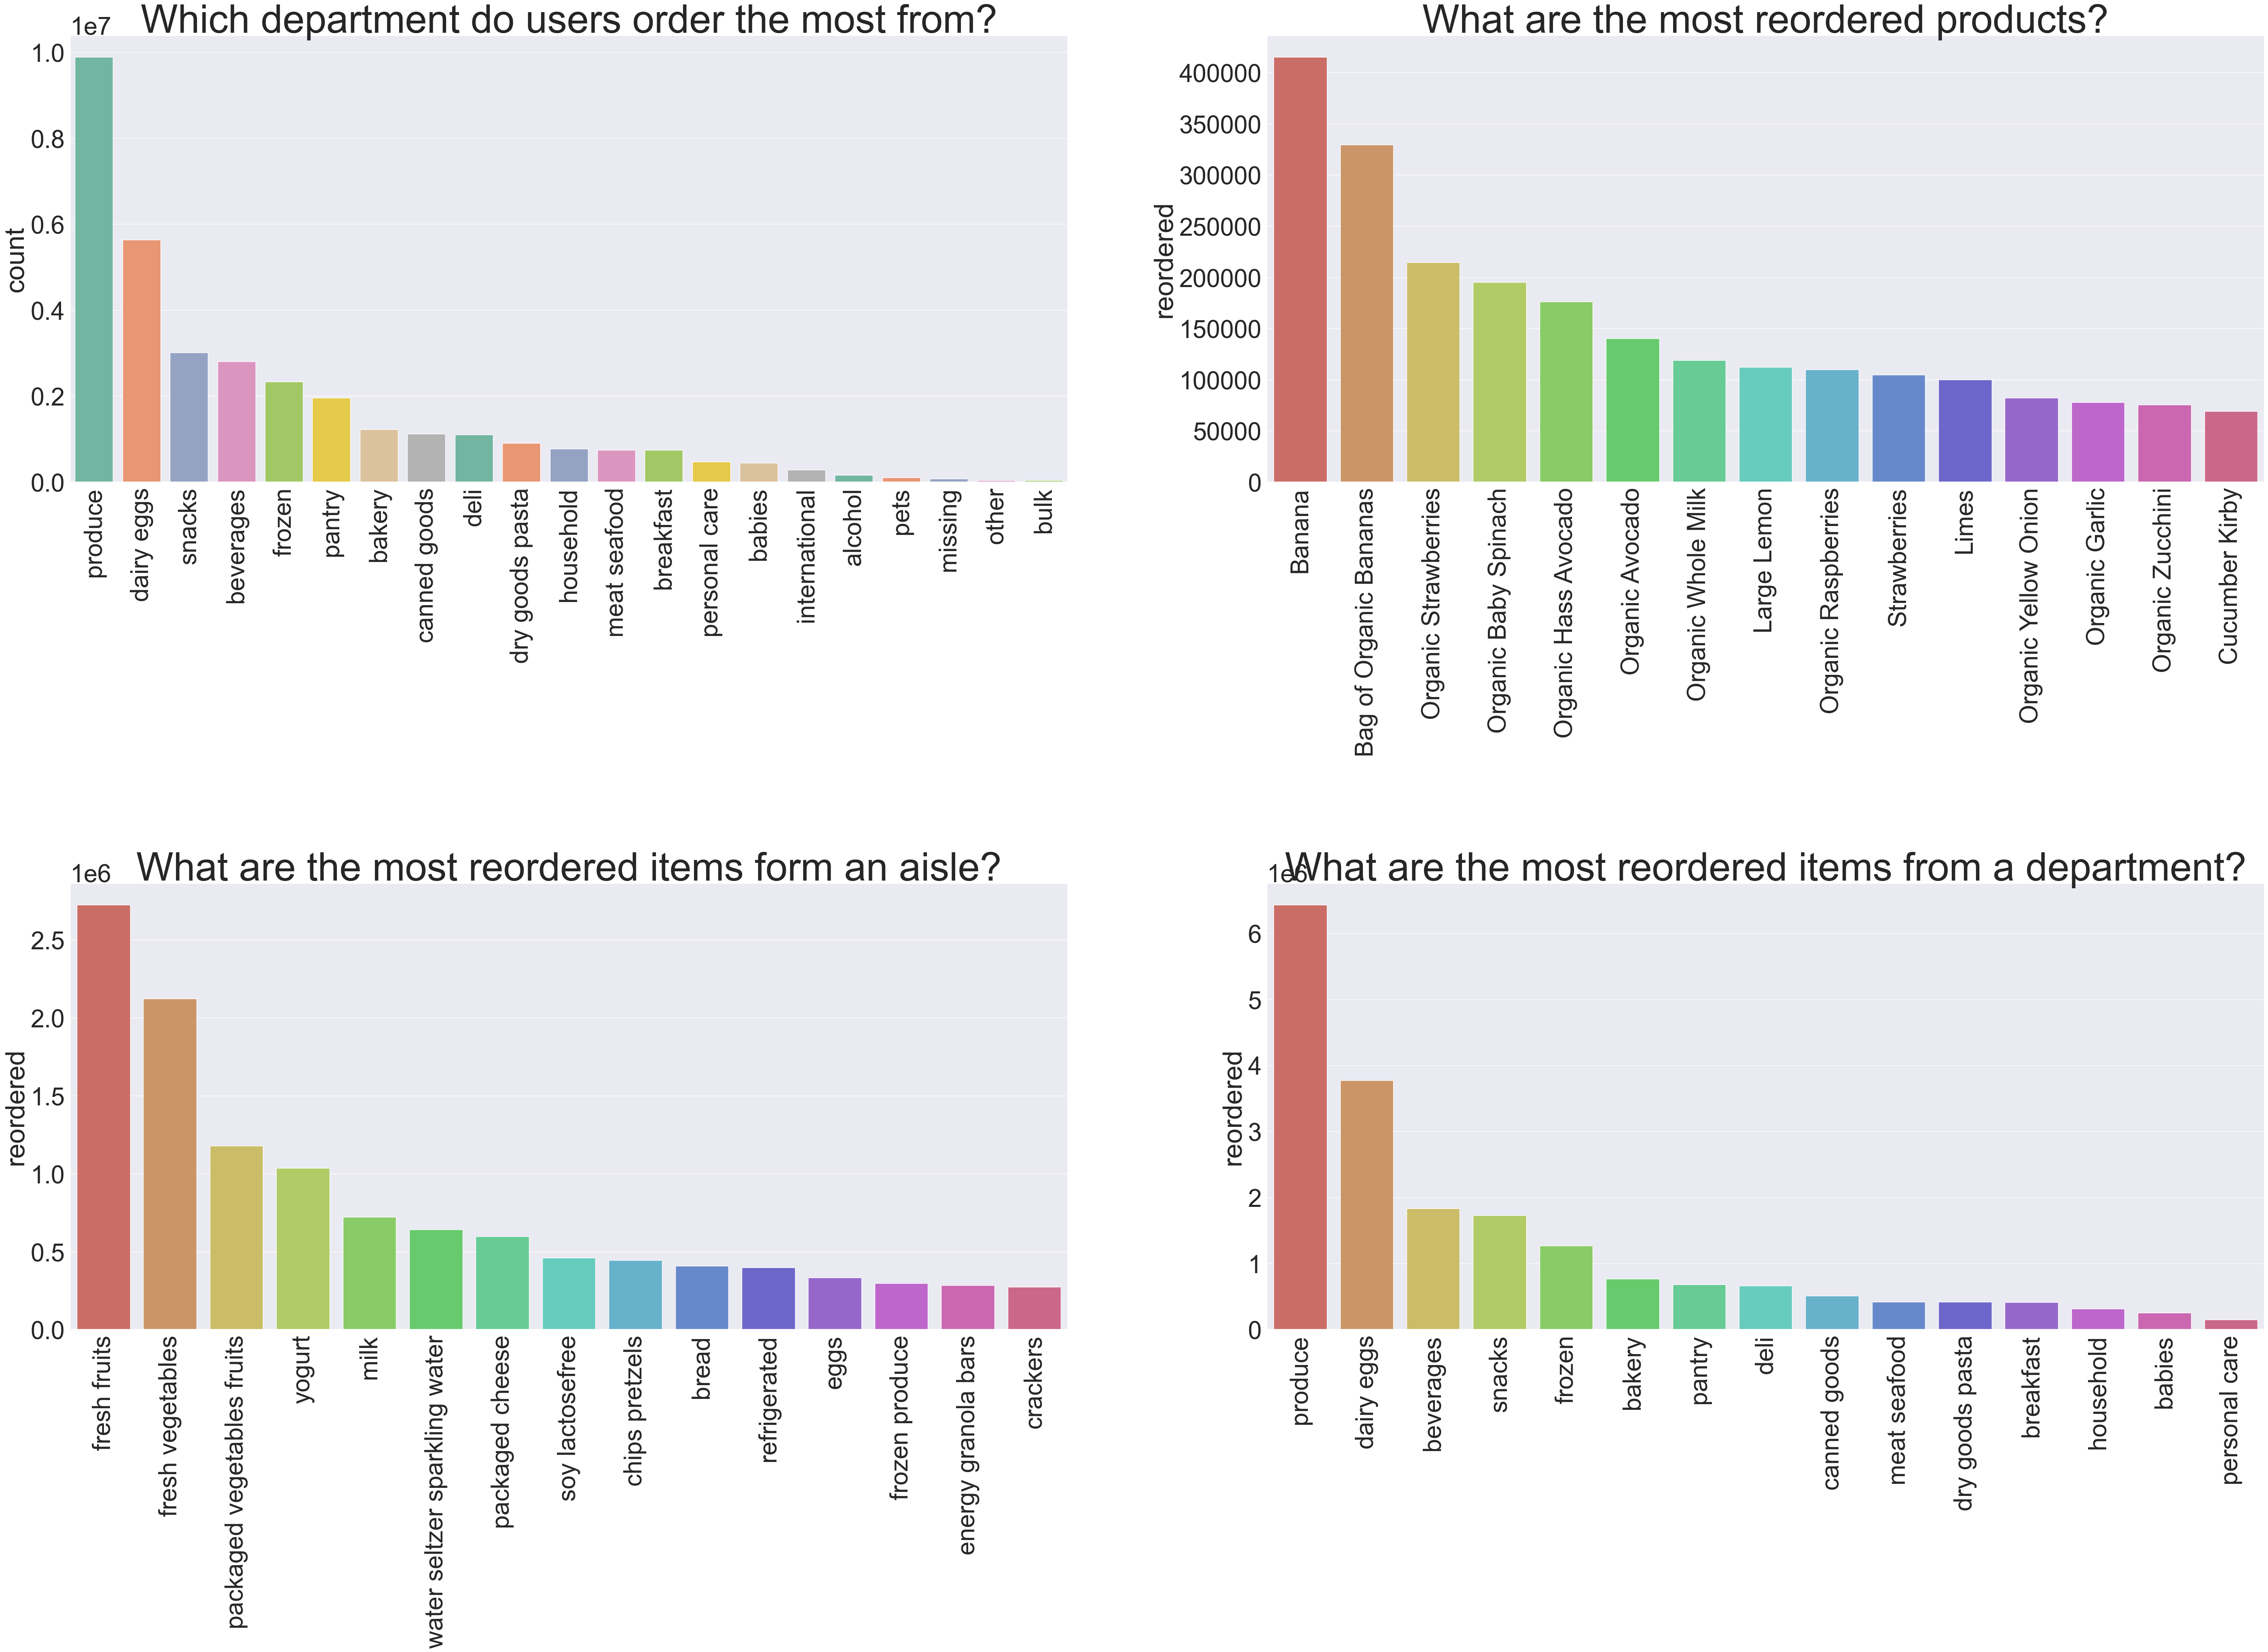

In [50]:

sns.set(style= "darkgrid")
#sns.set(font_scale = 2)
sns.set_context("notebook", font_scale=4)
fig, ax = plt.subplots(2,2, figsize = (70,40))

data = master_df.groupby('department', as_index = False)['department_id'].count().sort_values(by = 'department_id', ascending = False)
ax[0,0] = BuildViz(ax[0,0], data.head(25), "department", "department_id", "bar", palette = "Set2")
ax[0,0].set_xticklabels(data.head(25)['department'], rotation = 90)
ax[0,0].set_title('Which department do users order the most from?', fontsize=70)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('count')


data = master_df.groupby('product_name', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[0,1] = BuildViz(ax[0,1], data.head(15),'product_name' , "reordered", "bar", palette = "hls")
ax[0,1].set_xticklabels(data.head(15)['product_name'], rotation = 90)
ax[0,1].set_title('What are the most reordered products?', fontsize=70)
ax[0,1].set_xlabel('')


data = master_df.groupby('aisle', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[1,0] = BuildViz(ax[1,0], data.head(15),'aisle' , "reordered", "bar", palette = "hls")
ax[1,0].set_xticklabels(data.head(15)['aisle'], rotation = 90)
ax[1,0].set_title('What are the most reordered items form an aisle?', fontsize=70)
ax[1,0].set_xlabel('')


data = master_df.groupby('department', as_index = False)['reordered'].sum().sort_values(by= 'reordered', ascending=False)
ax[1,1] = BuildViz(ax[1,1], data.head(15),"department", "reordered", "bar",palette="hls")
ax[1,1].set_xticklabels(data.head(15)['department'], rotation = 90)
ax[1,1].set_title("What are the most reordered items from a department?", fontsize=70)
ax[1,1].set_xlabel('')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)

In [51]:
master_df.head(5)

order_id  product_id  add_to_cart_order  reordered  \
0         1       49302                  1          1   
1         1       10246                  3          0   
2         1       49683                  4          0   
3         1       43633                  5          1   
4         1       13176                  6          0   

                           product_name  aisle_id  department_id  \
0                      Bulgarian Yogurt       120             16   
1                 Organic Celery Hearts        83              4   
2                        Cucumber Kirby        83              4   
3  Lightly Smoked Sardines in Olive Oil        95             15   
4                Bag of Organic Bananas        24              4   

                 aisle    department  user_id eval_set  order_number  \
0               yogurt    dairy eggs   112108    train             4   
1     fresh vegetables       produce   112108    train             4   
2     fresh vegetables       produce   112108    train             4   
3  canned meat seafood  canned goods   112108    train             4   
4         fresh fruits       produce   112108    train             4   

   order_dow  order_hour_of_day  days_since_prior_order  
0          4                 10                     9.0  
1          4                 10                     9.0  
2          4                 10                     9.0  
3          4                 10                     9.0  
4          4                 10                     9.0

In [52]:


def run_PCA(data, features, name):
    pca = PCA(n_components = features)
    scale_data = pd.DataFrame(scale(data), columns = data.columns, index = data.index)
    pca_output = pca.fit_transform(data)
    df_pca = pd.DataFrame(data = pca_output, columns = [name + str(i) for i in range(features)], index = data.index)
    plot(pca.explained_variance_ratio_.cumsum(), linewidth = 2)
    print("\n Importance of Components")
    print(pd.DataFrame(data = pca.components_, columns = data.columns, index = ['prod_' + str(i) for i in range (features)]))
    return df_pca





 Importance of Components
aisle   air fresheners candles  asian foods  baby accessories  \
prod_0                0.000464     0.020537          0.001363   
prod_1                0.001283    -0.008505          0.000637   
prod_2                0.001187     0.015831          0.000216   
prod_3               -0.006602    -0.028403         -0.001904   
prod_4                0.000087    -0.001246          0.004897   
prod_5               -0.002983    -0.018950          0.001371   
prod_6                0.001726     0.011289          0.000395   
prod_7               -0.002451     0.005895          0.001130   
prod_8                0.000563    -0.009728         -0.000001   
prod_9               -0.006833    -0.019358         -0.001292   

aisle   baby bath body care  baby food formula  bakery desserts  \
prod_0             0.001093           0.072657         0.002780   
prod_1             0.000761           0.080638         0.003204   
prod_2             0.000349          -0.001875         0

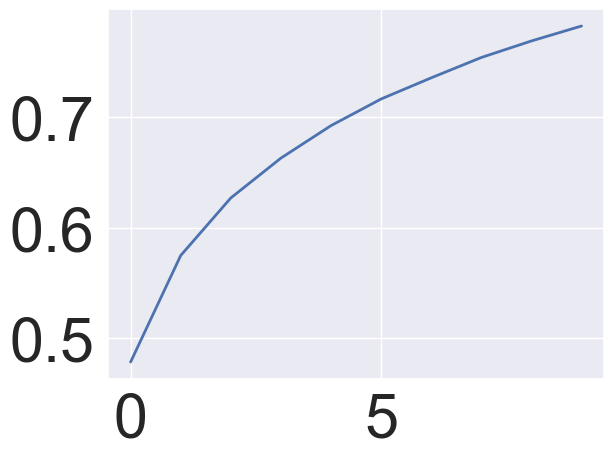

In [53]:
# PCA to find product preference
prod_pref = pd.pivot_table(master_df.groupby(['user_id','aisle'], as_index = False).size(), values = 'size', index= 'user_id',
                          columns =['aisle'], aggfunc = np.sum, fill_value=0)
prod_pref = run_PCA( prod_pref, 10, "prod_pref")

In [54]:
dept_pref = pd.pivot_table(master_df.groupby(['user_id', 'department'], as_index = False).size(), values = 'size', index = 'user_id',
                    columns = ['department'], aggfunc=np.sum, fill_value=0)

##dept_pref['total'] = dept_pref.sum(axis = 1)
#for dept in dept_pref.columns :
    #dept_pref[dept + '_perc'] = dept_pref[dept] / dept_pref['total']
    
dept_pref

department  alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
user_id                                                                         
1                 0       0       0         15          4     0             0   
2                 0       0       2          9          3     0             4   
3                 0       0       0          3          0     0             0   
4                 2       0       2          3          0     0             1   
5                 0       0       0          0          0     0             1   
...             ...     ...     ...        ...        ...   ...           ...   
206205            0       1       2          1          0     0             0   
206206            0       0       2         33          1     0             9   
206207            0       1       3         20          4     0            11   
206208            0       3      62         20         17     0            11   
206209            0       0      10         11         10     0             7   

department  dairy eggs  deli  dry goods pasta  ...  household  international  \
user_id                                        ...                             
1                   17     0                0  ...          3              0   
2                   49    24                0  ...          0              3   
3                   21     2                4  ...          1              0   
4                    0     2                0  ...          2              0   
5                    9     1                1  ...          1              4   
...                ...   ...              ...  ...        ...            ...   
206205              20     5                0  ...          0              1   
206206              39     5                1  ...         12              4   
206207              52     8                8  ...          0              1   
206208             161    28               17  ...          6              3   
206209              29     6                3  ...         15              1   

department  meat seafood  missing  other  pantry  personal care  pets  \
user_id                                                                 
1                      0        0      0       1              0     0   
2                      1        0      0      11              2     0   
3                      0        0      0       4              0     0   
4                      0        0      0       0              0     0   
5                      0        0      0       3              0     0   
...                  ...      ...    ...     ...            ...   ...   
206205                 1        2      0       1              0     0   
206206                 2        0      1      14             10     0   
206207                 6        0      0      15              0     0   
206208                22        2      0      38              5     0   
206209                 2        0      0       8              0     0   

department  produce  snacks  
user_id                      
1                 5      25  
2                43      47  
3                38       9  
4                 2       1  
5                23       1  
...             ...     ...  
206205           14       0  
206206           34      42  
206207           50      23  
206208          197      59  
206209           20      12  

[206209 rows x 21 columns]

In [55]:
dept_pref = pd.pivot_table(master_df.groupby(['user_id', 'department'], as_index = False).size(), values = 'size', index = 'user_id',
                    columns = ['department'], aggfunc=np.sum, fill_value=0)

dept_pref['total'] = dept_pref.sum(axis = 1)
for dept in dept_pref.columns :
    dept_pref[dept + '_perc'] = dept_pref[dept] / dept_pref['total']
    
dept_pref

department  alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
user_id                                                                         
1                 0       0       0         15          4     0             0   
2                 0       0       2          9          3     0             4   
3                 0       0       0          3          0     0             0   
4                 2       0       2          3          0     0             1   
5                 0       0       0          0          0     0             1   
...             ...     ...     ...        ...        ...   ...           ...   
206205            0       1       2          1          0     0             0   
206206            0       0       2         33          1     0             9   
206207            0       1       3         20          4     0            11   
206208            0       3      62         20         17     0            11   
206209            0       0      10         11         10     0             7   

department  dairy eggs  deli  dry goods pasta  ...  international_perc  \
user_id                                        ...                       
1                   17     0                0  ...            0.000000   
2                   49    24                0  ...            0.013274   
3                   21     2                4  ...            0.000000   
4                    0     2                0  ...            0.000000   
5                    9     1                1  ...            0.086957   
...                ...   ...              ...  ...                 ...   
206205              20     5                0  ...            0.019608   
206206              39     5                1  ...            0.014035   
206207              52     8                8  ...            0.004484   
206208             161    28               17  ...            0.004431   
206209              29     6                3  ...            0.007299   

department  meat seafood_perc  missing_perc  other_perc  pantry_perc  \
user_id                                                                
1                    0.000000      0.000000    0.000000     0.014286   
2                    0.004425      0.000000    0.000000     0.048673   
3                    0.000000      0.000000    0.000000     0.045455   
4                    0.000000      0.000000    0.000000     0.000000   
5                    0.000000      0.000000    0.000000     0.065217   
...                       ...           ...         ...          ...   
206205               0.019608      0.039216    0.000000     0.019608   
206206               0.007018      0.000000    0.003509     0.049123   
206207               0.026906      0.000000    0.000000     0.067265   
206208               0.032496      0.002954    0.000000     0.056130   
206209               0.014599      0.000000    0.000000     0.058394   

department  personal care_perc  pets_perc  produce_perc  snacks_perc  \
user_id                                                                
1                     0.000000        0.0      0.071429     0.357143   
2                     0.008850        0.0      0.190265     0.207965   
3                     0.000000        0.0      0.431818     0.102273   
4                     0.000000        0.0      0.111111     0.055556   
5                     0.000000        0.0      0.500000     0.021739   
...                        ...        ...           ...          ...   
206205                0.000000        0.0      0.274510     0.000000   
206206                0.035088        0.0      0.119298     0.147368   
206207                0.000000        0.0      0.224215     0.103139   
206208                0.007386        0.0      0.290990     0.087149   
206209                0.000000        0.0      0.145985     0.087591   

department  total_perc  
user_id                 
1                  1.0  
2                  1.0  
3        

In [56]:
# Create features to demonstrate trend of products prefered by users

model_input = prod_pref.merge(dept_pref, how = "left", on="user_id")

# Create features to demonstrate trends of orders made by users

model_input = model_input.merge(master_df.groupby('user_id', as_index = False).agg(
              {'order_id' : 'count',
               'product_id' : 'count',
               'days_since_prior_order' : 'mean',
               'add_to_cart_order': 'median',
              }).rename(
                columns={'order_id' : 'total_orders',
               'product_id' : 'total_products',
               'days_since_prior_order' : 'mean_days_since_prior_order',
                    'add_to_cart_order': 'meadian_cart_size'}),how= "left", on ='user_id')
model_input = model_input.set_index('user_id')
model_input

prod_pref0  prod_pref1  prod_pref2  prod_pref3  prod_pref4  \
user_id                                                               
1        -24.811636    3.449193   -1.611613   -0.470778    0.499501   
2         10.331587   39.529396    4.610970   14.683961   -7.375514   
3         -9.247469    2.382711  -11.077052    0.846670   -0.395392   
4        -29.242883   -0.880035   -1.984256    2.315426   -0.296212   
5        -19.186003   -3.037864    0.186761    3.651016    0.856539   
...             ...         ...         ...         ...         ...   
206205   -20.426644    5.176025    0.814328    7.350436   -0.054112   
206206    -6.163290   -0.200361    5.265754  -20.829060    0.906633   
206207     7.312526    7.660423    7.951974   -5.736298    1.752411   
206208    82.725416   20.649793    8.150483  -15.424937    9.490455   
206209   -14.326324    7.184042   -5.743652   -1.243511    1.555396   

         prod_pref5  prod_pref6  prod_pref7  prod_pref8  prod_pref9  ...  \
user_id                                                              ...   
1         -1.889290    2.685453   -3.660425   -2.649163   -1.407228  ...   
2         -2.020602    7.623365    4.112540   -9.990805  -12.402548  ...   
3         -2.786318   -6.675740    6.070094   -2.140320   -1.614129  ...   
4          0.979971    0.804983    0.718119    0.038856   -0.867490  ...   
5         -2.306483   -5.230252    2.246415    0.927463    3.349091  ...   
...             ...         ...         ...         ...         ...  ...   
206205    -0.430723   -0.649731   -1.836488    0.542780    1.499396  ...   
206206   -13.376177   13.176522    4.435178    7.119325  -12.566311  ...   
206207    -3.142349   -5.274062   -5.671342    2.108521   10.067696  ...   
206208   -37.215878  -17.711558   15.266240    0.447428   31.868018  ...   
206209    -5.281877    1.548393   -3.060186   -1.883583    0.767824  ...   

         pantry_perc  personal care_perc  pets_perc  produce_perc  \
user_id                                                             
1           0.014286            0.000000        0.0      0.071429   
2           0.048673            0.008850        0.0      0.190265   
3           0.045455            0.000000        0.0      0.431818   
4           0.000000            0.000000        0.0      0.111111   
5           0.065217            0.000000        0.0      0.500000   
...              ...                 ...        ...           ...   
206205      0.019608            0.000000        0.0      0.274510   
206206      0.049123            0.035088        0.0      0.119298   
206207      0.067265            0.000000        0.0      0.224215   
206208      0.056130            0.007386        0.0      0.290990   
206209      0.058394            0.000000        0.0      0.145985   

         snacks_perc  total_perc  total_orders  total_products  \
user_id                                                          
1           0.357143         1.0            70              70   
2           0.207965         1.0           226             226   
3           0.102273         1.0            88              88   
4           0.055556         1.0            18              18   
5           0.021739         1.0            46              46   
...              ...         ...           ...             ...   
206205      0.000000         1.0            51              51   
206206      0.147368         1.0           285             285   
206207      0.103139         1.0           223             223   
206208      0.087149         1.0           677             677   
206209      0.087591         1.0           137             137   

         mean_days_since_prior_order  meadian_cart_size  
user_id                                                  
1                          17.828571                4.0  
2                          16.973451                8.0  
3                          10.181818                4.0  
4                          11.944444             

In [57]:
import warnings
warnings.filterwarnings('ignore')

# check for outliers
for col in model_input.columns:
    cap_val = (np.mean(model_input[col]) + 3* np.std(model_input[col]))
    model_input[col+'_capped'] = 0
    model_input[col+ '_capped'][model_input[col] >= 0] = np.minimum(cap_val,model_input[col][model_input[col] >= 0])
    model_input[col+ '_capped'][model_input[col] < 0] = np.maximum((-1)*cap_val, model_input[col][model_input[col] < 0])
    print("\n Outliers", col)
    print("cap : ",cap_val)
    print("capped positive: ", sum(model_input[col][model_input[col] >=0]> cap_val))
    print("capped negative: ", sum(model_input[col][model_input[col]<0]< (-1)*cap_val))



scaler = StandardScaler()
model_input_scaled = pd.DataFrame(scaler.fit_transform(model_input), columns= model_input.columns, index=model_input.index)
model_input_scaled


 Outliers prod_pref0
cap :  134.50292580405184
capped positive:  4985
capped negative:  0

 Outliers prod_pref1
cap :  60.36426288570769
capped positive:  2371
capped negative:  1574

 Outliers prod_pref2
cap :  44.37619831377299
capped positive:  1965
capped negative:  1905

 Outliers prod_pref3
cap :  36.910633495688565
capped positive:  1085
capped negative:  2799

 Outliers prod_pref4
cap :  33.34502490881736
capped positive:  2375
capped negative:  811

 Outliers prod_pref5
cap :  30.18457023416069
capped positive:  2287
capped negative:  1792

 Outliers prod_pref6
cap :  26.898133897699505
capped positive:  1819
capped negative:  2375

 Outliers prod_pref7
cap :  26.386069972839103
capped positive:  2092
capped negative:  2241

 Outliers prod_pref8
cap :  23.777293029996493
capped positive:  2397
capped negative:  1431

 Outliers prod_pref9
cap :  22.620868218868992
capped positive:  2196
capped negative:  1763

 Outliers alcohol
cap :  19.111529508406097
capped positive:  2036


prod_pref0  prod_pref1  prod_pref2  prod_pref3  prod_pref4  \
user_id                                                               
1         -0.553407    0.171419   -0.108951   -0.038264    0.044939   
2          0.230439    1.964543    0.311719    1.193474   -0.663564   
3         -0.206259    0.118417   -0.748851    0.068815   -0.035573   
4         -0.652243   -0.043736   -0.134143    0.188192   -0.026650   
5         -0.427931   -0.150977    0.012626    0.296745    0.077061   
...             ...         ...         ...         ...         ...   
206205    -0.455603    0.257240    0.055052    0.597424   -0.004868   
206206    -0.137468   -0.009958    0.355985   -1.692932    0.081568   
206207     0.163101    0.380710    0.537584   -0.466231    0.157662   
206208     1.845136    1.026259    0.551004   -1.253699    0.853842   
206209    -0.319539    0.357035   -0.388293   -0.101069    0.139937   

         prod_pref5  prod_pref6  prod_pref7  prod_pref8  prod_pref9  ...  \
user_id                                                              ...   
1         -0.187774    0.299514   -0.416177   -0.334247   -0.186628  ...   
2         -0.200825    0.850248    0.467581   -1.260548   -1.644837  ...   
3         -0.276928   -0.744558    0.690148   -0.270046   -0.214067  ...   
4          0.097398    0.089781    0.081647    0.004902   -0.115047  ...   
5         -0.229238   -0.583340    0.255409    0.117019    0.444159  ...   
...             ...         ...         ...         ...         ...  ...   
206205    -0.042809   -0.072466   -0.208802    0.068483    0.198851  ...   
206206    -1.329439    1.469603    0.504264    0.898251   -1.666556  ...   
206207    -0.312313   -0.588226   -0.644811    0.266034    1.335187  ...   
206208    -3.698831   -1.975404    1.735716    0.056452    4.226365  ...   
206209    -0.524958    0.172695   -0.347932   -0.237653    0.101830  ...   

         pantry_perc_capped  personal care_perc_capped  pets_perc_capped  \
user_id                                                                    
1                 -0.876051                  -0.540553         -0.216791   
2                 -0.206196                  -0.228046         -0.216791   
3                 -0.268883                  -0.540553         -0.216791   
4                 -1.154336                  -0.540553         -0.216791   
5                  0.116097                  -0.540553         -0.216791   
...                     ...                        ...               ...   
206205            -0.772376                  -0.540553         -0.216791   
206206            -0.197425                   0.698510         -0.216791   
206207             0.155976                  -0.540553         -0.216791   
206208            -0.060926                  -0.279746         -0.216791   
206209            -0.016820                  -0.540553         -0.216791   

         produce_perc_capped  snacks_perc_capped  total_perc_capped  \
user_id                                                               
1                  -1.154067            3.179218                0.0   
2                  -0.493512            1.429753                0.0   
3                   0.849157            0.190267                0.0   
4                  -0.933492           -0.357601                0.0   
5                   1.228146           -0.754178                0.0   
...                      ...                 ...                ...   
206205             -0.025241           -1.009121                0.0   
206206             -0.887983            0.719120                0.0   
206207             -0.304803            0.200427                0.0   
206208              0.066363            0.012908                0.0   
206209             -0.739643            0.018093                0.0   

         total_orders_capped  total_products_capped  \
user_id                                               
1                  -0.498974              -0.498974   
2                 

In [58]:
model_input_scaled.columns[:100]

Index(['prod_pref0', 'prod_pref1', 'prod_pref2', 'prod_pref3', 'prod_pref4',
       'prod_pref5', 'prod_pref6', 'prod_pref7', 'prod_pref8', 'prod_pref9',
       'alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks', 'total',
       'alcohol_perc', 'babies_perc', 'bakery_perc', 'beverages_perc',
       'breakfast_perc', 'bulk_perc', 'canned goods_perc', 'dairy eggs_perc',
       'deli_perc', 'dry goods pasta_perc', 'frozen_perc', 'household_perc',
       'international_perc', 'meat seafood_perc', 'missing_perc', 'other_perc',
       'pantry_perc', 'personal care_perc', 'pets_perc', 'produce_perc',
       'snacks_perc', 'total_perc', 'total_orders', 'total_products',
       'mean_days_since_prior_order', 'meadian_cart_size', 'prod_pref0_capped',
       'prod_pref1_capped'

In [59]:
model_input_scaled.columns[100:200]

Index(['frozen_perc_capped', 'household_perc_capped',
       'international_perc_capped', 'meat seafood_perc_capped',
       'missing_perc_capped', 'other_perc_capped', 'pantry_perc_capped',
       'personal care_perc_capped', 'pets_perc_capped', 'produce_perc_capped',
       'snacks_perc_capped', 'total_perc_capped', 'total_orders_capped',
       'total_products_capped', 'mean_days_since_prior_order_capped',
       'meadian_cart_size_capped'],
      dtype='object')

In [60]:
X = model_input_scaled[['prod_pref0_capped',
       'prod_pref1_capped', 'prod_pref2_capped', 'prod_pref3_capped',
       'prod_pref4_capped', 'prod_pref5_capped', 'prod_pref6_capped',
       'prod_pref7_capped', 'prod_pref8_capped', 'prod_pref9_capped',
        'alcohol_perc', 'babies_perc', 'bakery_perc', 'beverages_perc',
       'breakfast_perc', 'bulk_perc', 'canned goods_perc', 'dairy eggs_perc',
       'deli_perc', 'dry goods pasta_perc', 'frozen_perc', 'household_perc',
       'international_perc', 'meat seafood_perc', 'missing_perc', 'other_perc',
       'pantry_perc', 'personal care_perc', 'pets_perc', 'produce_perc',
       'snacks_perc', 'total_orders_capped',
       'total_products_capped', 'mean_days_since_prior_order_capped',
       'meadian_cart_size_capped']]
#sns.pairplot(X)

In [61]:
#Modelling - K-means Clustering
# find the right number of clusters - Elbow Method

cluster_range = range(2,16)

kmeans_kwargs = {
    "init" : "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
      }

# A list holds the SSE values for eack k
sse = []
for k in cluster_range:
    kmeans =KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
 



The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) 
after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the 
sum of the squared Euclidean distances of each point to its closest centroid. 
Since this is a measure of error, the objective of k-means is to try to minimize this value.


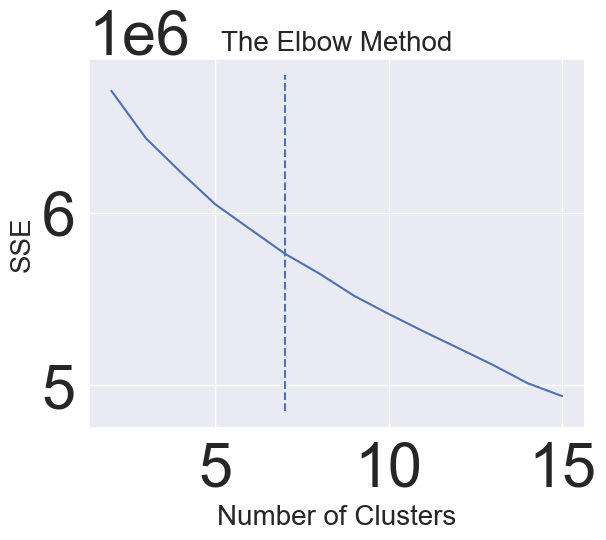

In [62]:


kn =  KneeLocator(
     cluster_range, sse, curve ="convex", direction= "decreasing")
plt.plot(cluster_range,sse)
plt.title('The Elbow Method',size = 20)
plt.xlabel('Number of Clusters',size= 20)
plt.ylabel('SSE', size = 20)
plt.ticklabel_format(useOffset=False)
plt.vlines(kn.knee,plt.ylim()[0],plt.ylim()[1], linestyle='dashed')


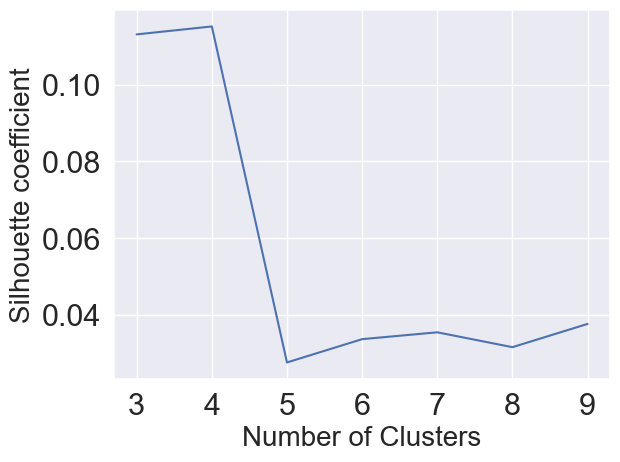

In [63]:
# find the right number of clusters - Silhouette Method

silhouette_coefficients = []
cluster_range = range(3,10)

for k in cluster_range:
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    #print(kmeans.labels_)
sns.set(font_scale = 2)   
plt.plot(cluster_range,silhouette_coefficients)
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters", size=20)
plt.ylabel("Silhouette coefficient", size=20)
plt.show()


In [64]:
start_time = time.time()
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, **kmeans_kwargs)
kmeans.fit(X)
print("\n Clusters ",n_clusters)
print("\n SSE ",kmeans.inertia_)
print("\n The iteration it took to converge : ", kmeans.n_iter_)
#print("\n centriod locations : ",kmeans.cluster_center)
model_input['segment_'+str(n_clusters)] = kmeans.labels_


n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, **kmeans_kwargs)
kmeans.fit(X)
print("\nClusters ",n_clusters)
print("\n SSE ",kmeans.inertia_)
print("\n The iteration it took to converge : ", kmeans.n_iter_)
#print("\n centriod locations : ",kmeans.cluster_center)
model_input['segment_'+str(n_clusters)] = kmeans.labels_

n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters,**kmeans_kwargs)
kmeans.fit(X)
print("\nClusters ",n_clusters)
print("\n SSE ",kmeans.inertia_)
print("\n The iteration it took to converge : ",kmeans.n_iter_)
#print("\n centriod locations : ",kmeans.cluster_center)
model_input['segment_'+str(n_clusters)] = kmeans.labels_


n_clusters = 7
kmeans = KMeans(n_clusters = n_clusters,**kmeans_kwargs)
kmeans.fit(X)
print("\nClusters ",n_clusters)
print("\n SSE ",kmeans.inertia_)
print("\n The iteration it took to converge : ",kmeans.n_iter_)
#print("\n centriod locations : ",kmeans.cluster_center)
model_input['segment_'+str(n_clusters)] = kmeans.labels_

model_output = model_input
print("--- {} minutes ---".format((time.time() - start_time)/60.0))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


 Clusters  4

 SSE  6242307.478082234

 The iteration it took to converge :  16

Clusters  5

 SSE  6049822.52262892

 The iteration it took to converge :  31

Clusters  6

 SSE  5906488.051499708

 The iteration it took to converge :  29

Clusters  7

 SSE  5799467.48605636

 The iteration it took to converge :  33
--- 0.2815346956253052 minutes ---


In [65]:
model_output.columns[:100]

Index(['prod_pref0', 'prod_pref1', 'prod_pref2', 'prod_pref3', 'prod_pref4',
       'prod_pref5', 'prod_pref6', 'prod_pref7', 'prod_pref8', 'prod_pref9',
       'alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks', 'total',
       'alcohol_perc', 'babies_perc', 'bakery_perc', 'beverages_perc',
       'breakfast_perc', 'bulk_perc', 'canned goods_perc', 'dairy eggs_perc',
       'deli_perc', 'dry goods pasta_perc', 'frozen_perc', 'household_perc',
       'international_perc', 'meat seafood_perc', 'missing_perc', 'other_perc',
       'pantry_perc', 'personal care_perc', 'pets_perc', 'produce_perc',
       'snacks_perc', 'total_perc', 'total_orders', 'total_products',
       'mean_days_since_prior_order', 'meadian_cart_size', 'prod_pref0_capped',
       'prod_pref1_capped'

In [66]:
model_output.columns[100:200]

Index(['frozen_perc_capped', 'household_perc_capped',
       'international_perc_capped', 'meat seafood_perc_capped',
       'missing_perc_capped', 'other_perc_capped', 'pantry_perc_capped',
       'personal care_perc_capped', 'pets_perc_capped', 'produce_perc_capped',
       'snacks_perc_capped', 'total_perc_capped', 'total_orders_capped',
       'total_products_capped', 'mean_days_since_prior_order_capped',
       'meadian_cart_size_capped', 'segment_4', 'segment_5', 'segment_6',
       'segment_7'],
      dtype='object')

In [67]:
len(model_output.columns)

120

In [68]:
# create master dataset with output
master_df = master_df.merge(model_output[['total_orders_capped',
       'total_products_capped', 'mean_days_since_prior_order_capped',
       'meadian_cart_size_capped', 'alcohol_perc', 'babies_perc', 'bakery_perc', 'beverages_perc',
       'breakfast_perc', 'bulk_perc', 'canned goods_perc', 'dairy eggs_perc',
       'deli_perc', 'dry goods pasta_perc', 'frozen_perc', 'household_perc',
       'international_perc', 'meat seafood_perc', 'missing_perc', 'other_perc',
       'pantry_perc', 'personal care_perc', 'pets_perc', 'produce_perc','segment_4',
       'segment_5', 'segment_6','segment_7']], how= 'left', on='user_id')

In [69]:
master_df

order_id  product_id  add_to_cart_order  reordered  \
0                1       49302                  1          1   
1                1       10246                  3          0   
2                1       49683                  4          0   
3                1       43633                  5          1   
4                1       13176                  6          0   
...            ...         ...                ...        ...   
33819101   3421083       35211                  5          0   
33819102   3421083       39678                  6          1   
33819103   3421083       11352                  7          0   
33819104   3421083        4600                  8          0   
33819105   3421083       24852                  9          1   

                                          product_name  aisle_id  \
0                                     Bulgarian Yogurt       120   
1                                Organic Celery Hearts        83   
2                                       Cucumber Kirby        83   
3                 Lightly Smoked Sardines in Olive Oil        95   
4                               Bag of Organic Bananas        24   
...                                                ...       ...   
33819101  Organic Strawberry & Mango Dried Tiny Fruits        92   
33819102     Free & Clear Natural Dishwasher Detergent        74   
33819103  Organic Mini Sandwich Crackers Peanut Butter        78   
33819104               All Natural French Toast Sticks        52   
33819105                                        Banana        24   

          department_id                aisle    department  user_id  ...  \
0                    16               yogurt    dairy eggs   112108  ...   
1                     4     fresh vegetables       produce   112108  ...   
2                     4     fresh vegetables       produce   112108  ...   
3                    15  canned meat seafood  canned goods   112108  ...   
4                     4         fresh fruits       produce   112108  ...   
...                 ...                  ...           ...      ...  ...   
33819101             18    baby food formula        babies    25247  ...   
33819102             17      dish detergents     household    25247  ...   
33819103             19             crackers        snacks    25247  ...   
33819104              1     frozen breakfast        frozen    25247  ...   
33819105              4         fresh fruits       produce    25247  ...   

         missing_perc  other_perc  pantry_perc  personal care_perc  pets_perc  \
0                 0.0         0.0        0.000                 0.0        0.0   
1                 0.0         0.0        0.000                 0.0        0.0   
2                 0.0         0.0        0.000                 0.0        0.0   
3                 0.0         0.0        0.000                 0.0        0.0   
4                 0.0         0.0        0.000                 0.0        0.0   
...               ...         ...          ...                 ...        ...   
33819101          0.0         0.0        0.076                 0.0        0.0   
33819102          0.0         0.0        0.076                 0.0        0.0   
33819103          0.0         0.0        0.076                 0.0        0.0   
33819104          0.0         0.0        0.076                 0.0        0.0   
33819105          0.0         0.0        0.076                 0.0        0.0   

          produce_perc  segment_4  segment_5  segment_6  segment_7  
0             0.241379          0          1          1          3  
1             0.241379          0          1          1          3  
2             0.241379          0          1          1          3  
3             0.241379          0          1          1          3  
4             0.241379          0          1          1          3  
...                ...        ...        ...        ...        ...  
33819101      0.312000          0          1          1

In [70]:
#Distribution with other segments (K+1, K-1)
display(pd.crosstab(master_df['segment_4'],master_df['segment_5'], margins = False).apply(lambda r : round(r/r.sum(), 2), axis=1))
pd.crosstab(master_df['segment_4'], master_df['segment_6'],margins = False).apply(lambda r : round(r/r.sum(),2), axis=1)


segment_5     0     1     2     3     4
segment_4                              
0          0.00  0.97  0.01  0.01  0.01
1          0.00  0.01  0.01  0.06  0.92
2          0.00  0.00  0.90  0.10  0.00
3          0.97  0.00  0.01  0.01  0.01

segment_6     0     1     2     3     4     5
segment_4                                    
0          0.01  0.95  0.01  0.01  0.00  0.01
1          0.02  0.01  0.01  0.91  0.01  0.06
2          0.01  0.00  0.89  0.00  0.00  0.10
3          0.71  0.01  0.00  0.06  0.20  0.01

In [71]:
def SegmentSummary(n):
    segment = 'segment_'+str(n)
    sns.set(font_scale = 2)
    fig, ax = plt.subplots(1, n , figsize=(22,3))
    
    data = master_df.groupby([segment, 'aisle'], as_index = False).size().sort_values(by = 'size', ascending = False)
    for i in range (n):
        ax[i] =BuildViz(ax[i], data[data[segment]==i].head(5), "aisle", "size","bar",legend = False, size=None, hue=None,palette="dark")
        ax[i].set_xticklabels(data[data[segment]==i].head(5)["aisle"], rotation=90,size = 30)
        ax[i].set_xlabel('')
        ax[i].set_title('Segment '+str(i), fontsize=40)
        ax[i].set_ylabel('')
    plt.show()
    
    data = master_df.groupby([segment, 'department'], as_index = False).size().sort_values(by= 'size', ascending = False)
    for i in range(n):
        ax[i]=BuildViz(ax[i],data[data[segment]==i].head(5), "department", "size","bar",legend =False, size=None,hue=None,palette="Set2")
        ax[i].set_xticklabels(data[data[segment]==i].head(5)['department'], rotation=90, size =30)
        ax[i].set_xlabel('')
        ax[i].set_title('Segment '+str(i), fontsize=40)
        ax[i].set_ylabel('')
    plt.show()
    
    summary = master_df.groupby(segment, as_index=False).agg(
                {segment: 'count',
                'reordered': 'sum',
                'order_dow':'median',
                'order_hour_of_day':'median',
                'days_since_prior_order':'median',
                'total_orders_capped':['sum','mean'],
                'total_products_capped': ['sum','mean'],
                'mean_days_since_prior_order_capped':'mean',
                'meadian_cart_size_capped': 'median'}).astype(float)
    
    summary['n_size_perc'] = [round(i/sum(summary[segment]['count']),2) for i in summary[segment]['count']]
    summary['reordered_prec'] = [round(i/sum(summary['reordered']['sum']),2) for i in summary['reordered']['sum']]
    summary['total_orders_capped_prec'] = [round(i/sum(summary['total_orders_capped']['sum']),2) for i in summary['total_orders_capped']['sum']]
    summary['total_products_capped_prec'] = [round(i/sum(summary['total_products_capped']['sum']),2) for i in summary['total_products_capped']['sum']]
    display(summary)
    return summary

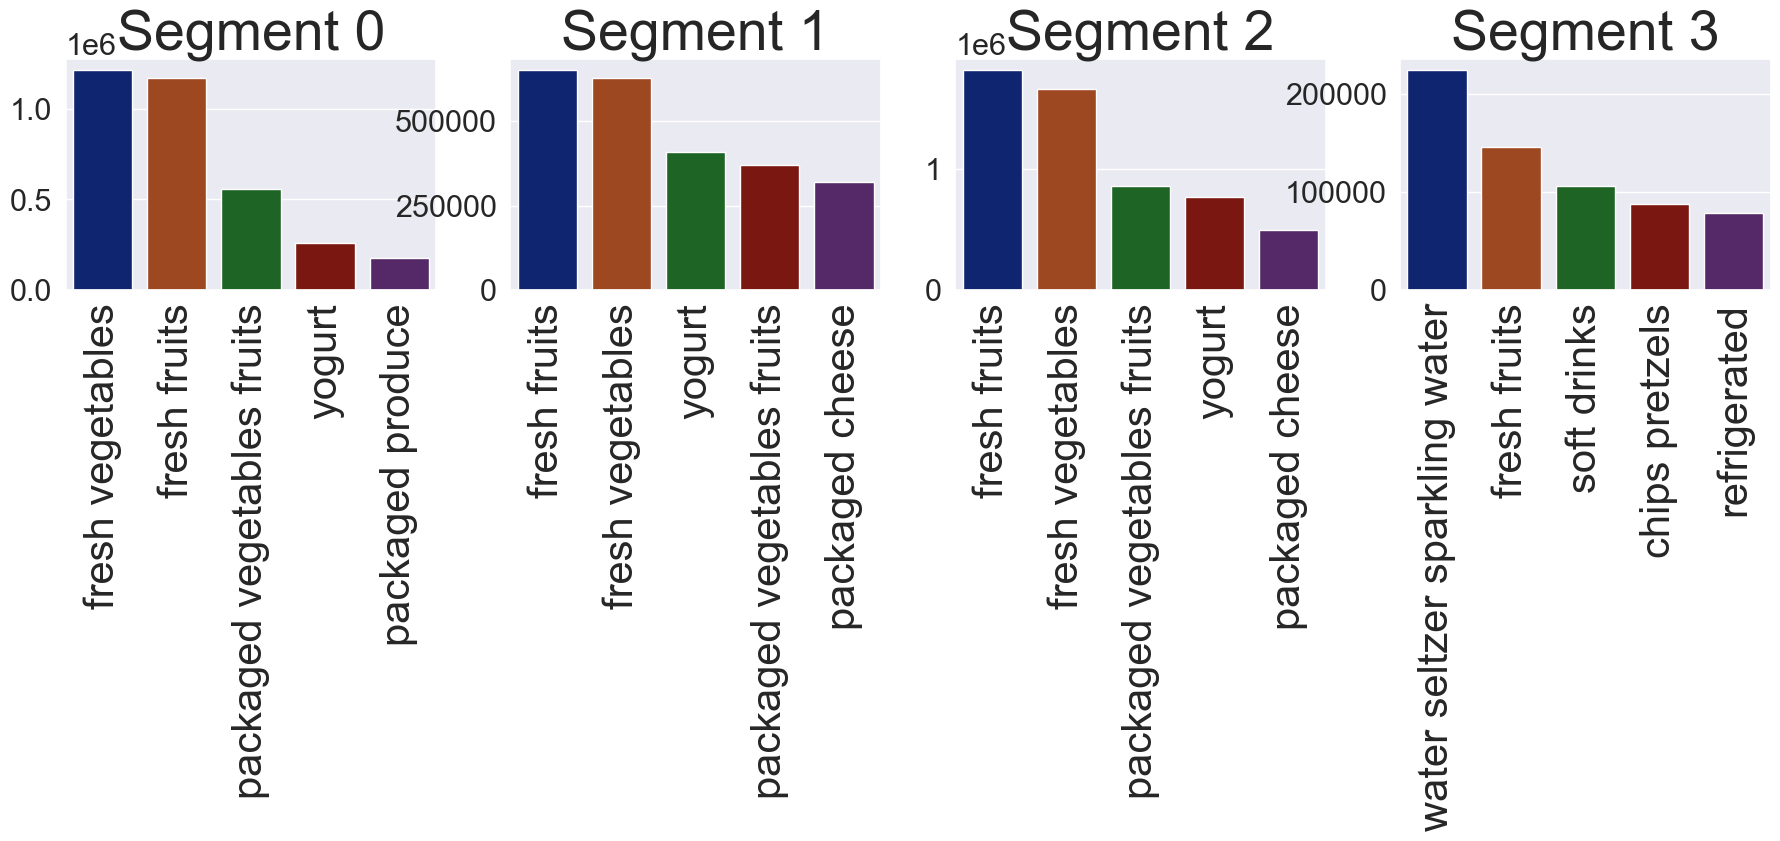

segment_4    reordered order_dow order_hour_of_day  \
         count          sum    median            median   
0  7,117,463.0  3,658,856.0       2.0              14.0   
1  8,965,739.0  4,069,091.0       3.0              14.0   
2 15,272,453.0 10,922,361.0       3.0              13.0   
3  2,463,451.0  1,305,052.0       3.0              13.0   

  days_since_prior_order  total_orders_capped                     \
                  median                  sum               mean   
0                    9.0      1,227,919,759.0 172.52211342721415   
1                   11.0      1,516,267,315.0 169.11794052894024   
2                    6.0 9,383,840,527.784737  614.4291639191646   
3                    8.0        378,809,791.0 153.77200155391765   

  total_products_capped                    mean_days_since_prior_order_capped  \
                    sum               mean                               mean   
0       1,227,919,759.0 172.52211342721415                 12.534218723722203   
1       1,516,267,315.0 169.11794052894024                  13.86372891292062   
2  9,383,840,527.784737  614.4291639191646                   7.69718499051855   
3         378,809,791.0 153.77200155391765                 12.033806233612928   

  meadian_cart_size_capped n_size_perc reordered_prec  \
                    median                              
0                      6.0        0.21           0.18   
1                      7.0        0.27            0.2   
2                      8.0        0.45           0.55   
3                      4.0        0.07           0.07   

  total_orders_capped_prec total_products_capped_prec  
                                                       
0                      0.1                        0.1  
1                     0.12                       0.12  
2                     0.75                       0.75  
3                     0.03                       0.03

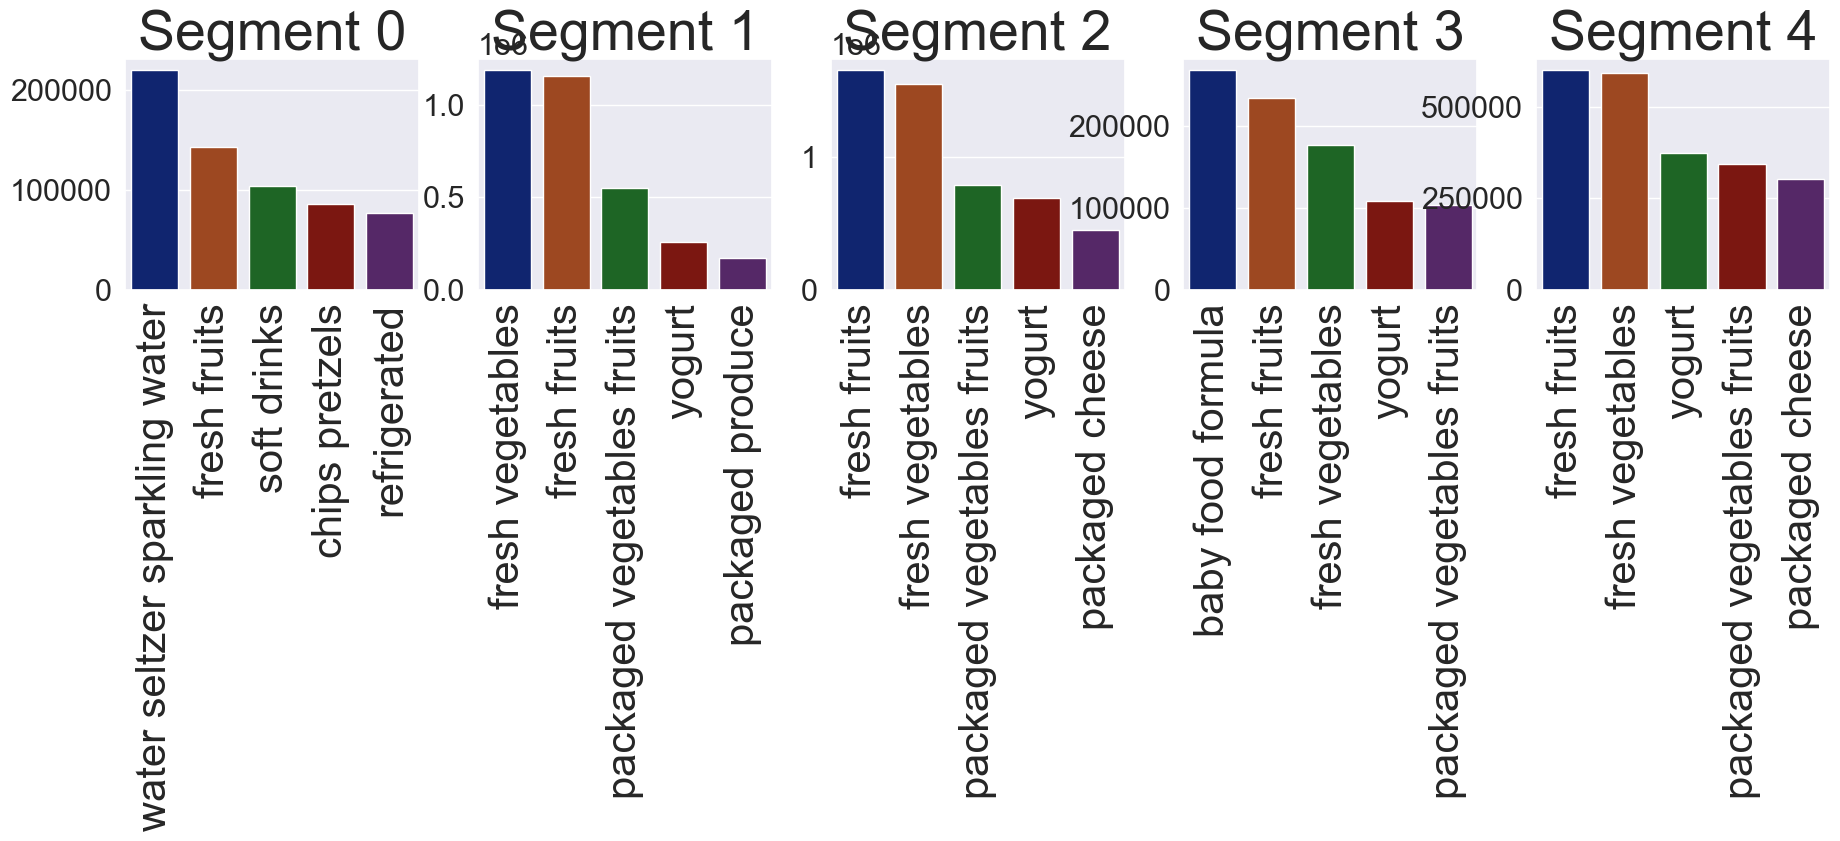

segment_5   reordered order_dow order_hour_of_day days_since_prior_order  \
         count         sum    median            median                 median   
0  2,392,566.0 1,269,302.0       3.0              13.0                    9.0   
1  7,004,022.0 3,591,665.0       2.0              14.0                    9.0   
2 13,938,177.0 9,943,917.0       3.0              13.0                    6.0   
3  2,070,604.0 1,362,330.0       2.0              13.0                    7.0   
4  8,413,737.0 3,788,146.0       3.0              14.0                   11.0   

    total_orders_capped                    total_products_capped  \
                    sum               mean                   sum   
0         363,453,166.0 151.90935840432405         363,453,166.0   
1       1,190,286,900.0 169.94334112599876       1,190,286,900.0   
2  8,476,980,899.625492  608.1843342659153  8,476,980,899.625492   
3 1,084,860,700.1592457  523.9344172807769 1,084,860,700.1592457   
4       1,391,255,727.0 165.35526686893112       1,391,255,727.0   

                     mean_days_since_prior_order_capped  \
                mean                               mean   
0 151.90935840432405                 12.070104649150744   
1 169.94334112599876                 12.582896655664417   
2  608.1843342659153                  7.720325190302864   
3  523.9344172807769                  9.039482199396891   
4 165.35526686893112                 13.950536723455938   

  meadian_cart_size_capped n_size_perc reordered_prec  \
                    median                              
0                      4.0        0.07           0.06   
1                      6.0        0.21           0.18   
2                      8.0        0.41            0.5   
3                      9.0        0.06           0.07   
4                      6.5        0.25           0.19   

  total_orders_capped_prec total_products_capped_prec  
                                                       
0                     0.03                       0.03  
1                      0.1                        0.1  
2                     0.68                       0.68  
3                     0.09                       0.09  
4                     0.11                       0.11

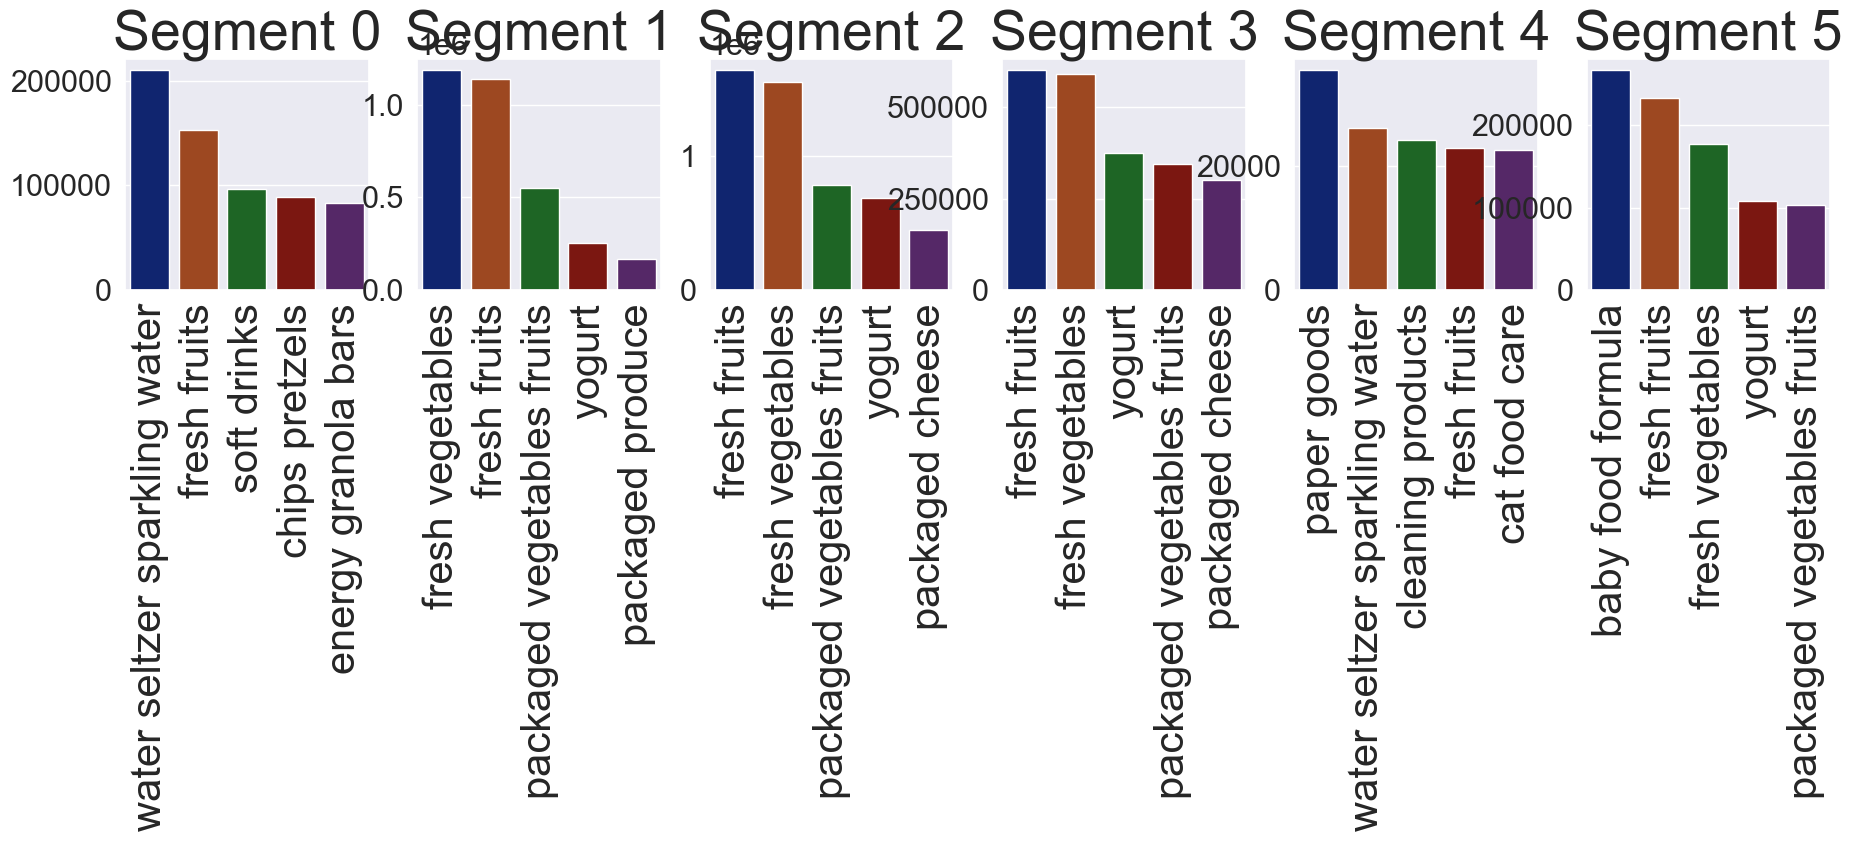

segment_6   reordered order_dow order_hour_of_day days_since_prior_order  \
         count         sum    median            median                 median   
0  2,079,923.0 1,200,478.0       3.0              13.0                    8.0   
1  6,899,513.0 3,529,154.0       2.0              14.0                    9.0   
2 13,783,000.0 9,833,016.0       3.0              13.0                    6.0   
3  8,384,783.0 3,768,660.0       3.0              14.0                   11.0   
4    602,306.0   259,890.0       3.0              14.0                   11.0   
5  2,069,581.0 1,364,162.0       2.0              13.0                    7.0   

   total_orders_capped                    total_products_capped  \
                   sum               mean                   sum   
0        359,029,401.0 172.61667907898513         359,029,401.0   
1      1,178,095,085.0 170.75046963459596       1,178,095,085.0   
2 8,412,073,232.314309  610.3223704791634  8,412,073,232.314309   
3      1,384,342,317.0 165.10174646141706       1,384,342,317.0   
4         85,093,308.0  141.2791969530438          85,093,308.0   
5 1,088,204,049.470428  525.8088712016722  1,088,204,049.470428   

                     mean_days_since_prior_order_capped  \
                mean                               mean   
0 172.61667907898513                  11.31879305147354   
1 170.75046963459596                 12.608421782812787   
2  610.3223704791634                   7.71690459261409   
3 165.10174646141706                 13.939777809395903   
4  141.2791969530438                 13.714347856405215   
5  525.8088712016722                  9.021860463543103   

  meadian_cart_size_capped n_size_perc reordered_prec  \
                    median                              
0                      4.0        0.06           0.06   
1                      6.0         0.2           0.18   
2                      8.0        0.41           0.49   
3                      6.5        0.25           0.19   
4                      4.0        0.02           0.01   
5                      9.0        0.06           0.07   

  total_orders_capped_prec total_products_capped_prec  
                                                       
0                     0.03                       0.03  
1                     0.09                       0.09  
2                     0.67                       0.67  
3                     0.11                       0.11  
4                     0.01                       0.01  
5                     0.09                       0.09

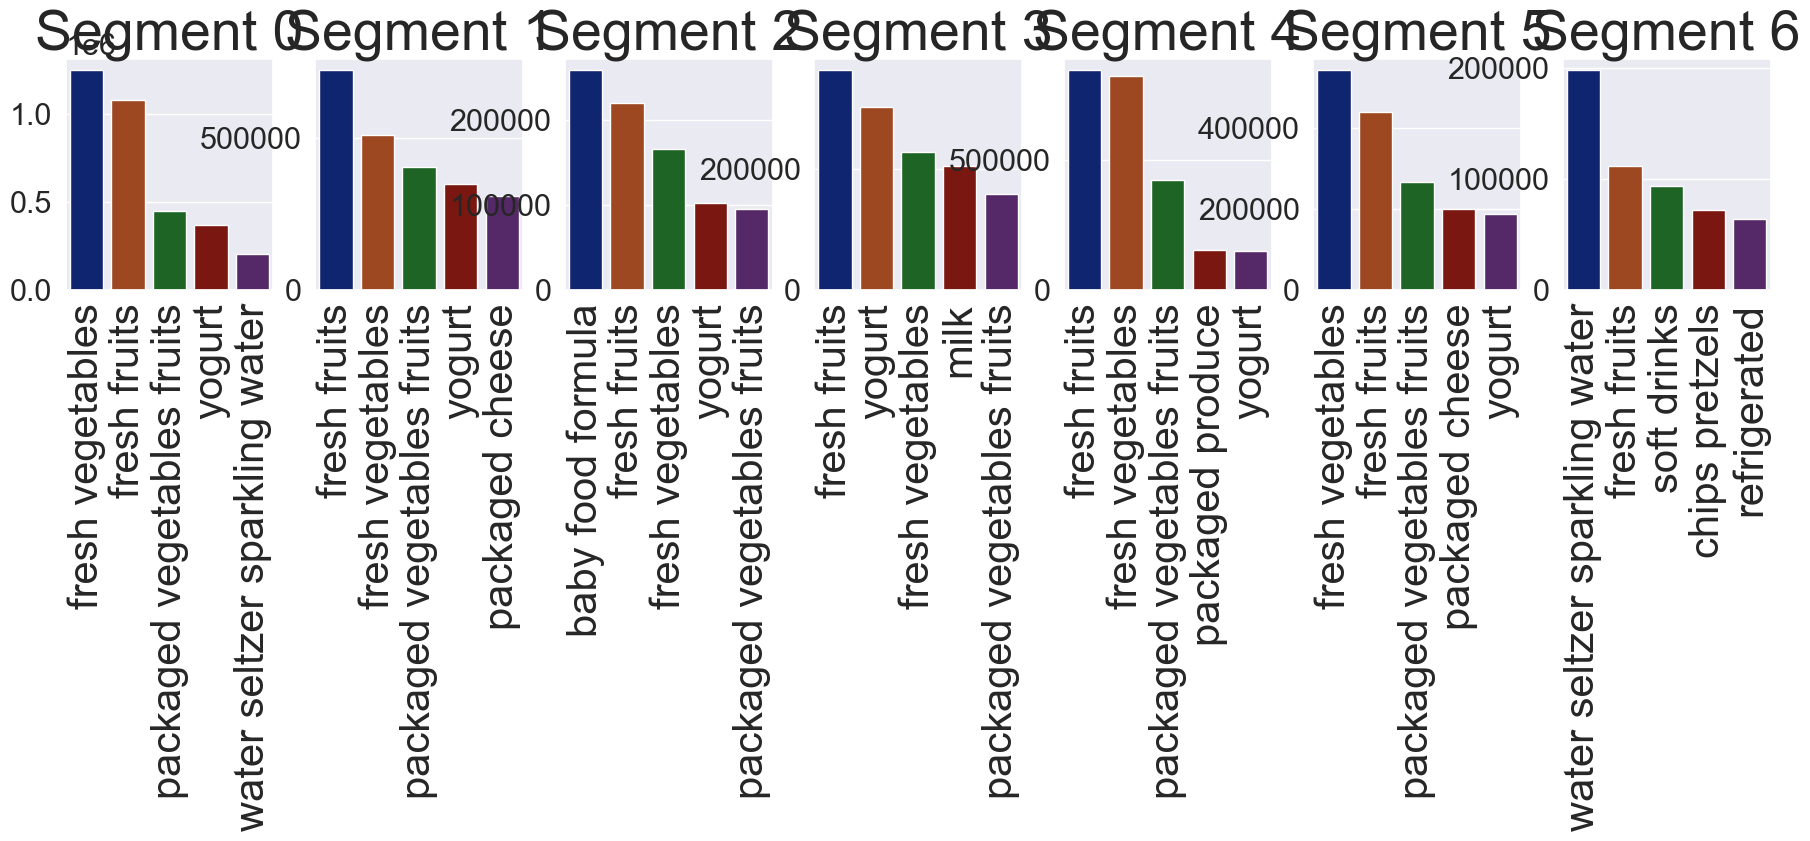

segment_7   reordered order_dow order_hour_of_day days_since_prior_order  \
        count         sum    median            median                 median   
0 7,311,748.0 5,156,213.0       3.0              13.0                    6.0   
1 7,864,429.0 5,560,630.0       3.0              13.0                    7.0   
2 1,931,562.0 1,264,910.0       2.0              13.0                    7.0   
3 3,633,611.0 1,889,913.0       3.0              13.0                    9.0   
4 4,950,945.0 2,463,178.0       2.0              14.0                   10.0   
5 6,118,742.0 2,571,458.0       3.0              14.0                   12.0   
6 2,008,069.0 1,049,058.0       3.0              13.0                    9.0   

    total_orders_capped                    total_products_capped  \
                    sum               mean                   sum   
0 4,165,742,460.7163672  569.7327726169402 4,165,742,460.7163672   
1  4,723,070,468.403599  600.5611428882629  4,723,070,468.403599   
2 1,001,940,852.6647708  518.7205239411269 1,001,940,852.6647708   
3         582,366,941.0 160.27223084694538         582,366,941.0   
4         739,382,303.0 149.34165154329122         739,382,303.0   
5         996,171,650.0 162.80661122825575         996,171,650.0   
6         298,162,717.0  148.4823066338856         298,162,717.0   

                     mean_days_since_prior_order_capped  \
                mean                               mean   
0  569.7327726169402                  7.754855473684268   
1  600.5611428882629                  8.103999540208196   
2  518.7205239411269                  9.110683477931332   
3 160.27223084694538                  12.43807138408597   
4 149.34165154329122                  12.96251947860459   
5 162.80661122825575                 14.489181599747138   
6  148.4823066338856                 12.275412348878449   

  meadian_cart_size_capped n_size_perc reordered_prec  \
                    median                              
0                      7.0        0.22           0.26   
1                      8.0        0.23           0.28   
2                      9.0        0.06           0.06   
3                      5.0        0.11           0.09   
4                      6.0        0.15           0.12   
5                      7.0        0.18           0.13   
6                      4.0        0.06           0.05   

  total_orders_capped_prec total_products_capped_prec  
                                                       
0                     0.33                       0.33  
1                     0.38                       0.38  
2                     0.08                       0.08  
3                     0.05                       0.05  
4                     0.06                       0.06  
5                     0.08                       0.08  
6                     0.02                       0.02

--- 0.6201570789019267 minutes ---


In [72]:
start_time = time.time()
pd.options.display.float_format = '{:,}'.format
summary_4 = SegmentSummary(4)
summary_5= SegmentSummary(5)
summary_6= SegmentSummary(6)
summary_7= SegmentSummary(7)
print("--- {} minutes ---".format((time.time() - start_time)/60.0))

In [ ]:

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,